In [ ]:
# !pip install scikit_posthocs
# !pip install baycomp
# !pip install catboost

# Importación de bibliotecas

In [ ]:
# 1. Importar bibliotecas ----------------------------------------------------------------------------------------------------------------------------
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split   #type: ignore
from sklearn.metrics import  make_scorer, accuracy_score, recall_score, precision_score, f1_score    #type: ignore
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier   #type: ignore
from sklearn.svm import SVC #type: ignore
from sklearn.neighbors import KNeighborsClassifier   #type: ignore
from sklearn.tree import DecisionTreeClassifier  #type: ignore
from xgboost import XGBClassifier    #type: ignore
import matplotlib.pyplot as plt #type: ignore
import scikit_posthocs as sp    #type: ignore
from catboost import CatBoostClassifier  #type: ignore
import baycomp  #type: ignore
from tqdm import tqdm   #type: ignore

# Definición del dataframe

In [ ]:
# 2. Cargar el dataset y preparar datos -------------------------------------------------------------------------------------------------------------
df = pd.read_csv("train.csv")
X = pd.read_csv("DF_train.csv")
# Separar en conjuntos de train y validation
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns = ["Name", "Transported"]),         # Eliminamos columnas de "target" y Nombre (no significativa)
    df["Transported"],
    test_size = 0.2,                                    # El conjunto de validación será el 20% del dataset de entrenamiento
    random_state = 42
)

# Comparación de modelos de clasificación

Se decidió comparar 9 clasificadores diferentes para asegurarnos de elegir correctamente.

In [ ]:
# 3. Definición, entrenamiento y evaluación de clasificadores ----------------------------------------------------------------------------------------
# Definir los clasificadores
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(),
    'KNN Classifier': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42)
}

# Definir las métricas para la validación cruzada
# Le damos prioridad al accuracy, para saber el porcantaje de predcciones correctas, pero también evaluamos otras métricas importantes
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Recall':  make_scorer(recall_score, average='macro'),
    'Precision': make_scorer(precision_score, average='macro'),
    'F1': make_scorer(f1_score, average='macro')
}

# Evaluar los clasificadores utilizando 5-fold cross-validation y guardar los resultados por cada métrica
results:dict = {}
for name, model in tqdm(classifiers.items(), desc="Evaluando Modelos"):
    results[name] = {}
    for metric_name, metric in tqdm(scoring.items(), desc=f"Evaluando métricas para {name}", leave=False):
        scores = cross_val_score(model, X, y_train, cv=5, scoring=metric)
        results[name][metric_name] = scores                                                             # Guardar los 5 resultados individuales

# Convertir los resultados a un DataFrame para cada métrica
acc_df = pd.DataFrame({model: results[model]['Accuracy'] for model in classifiers.keys()}).abs()        # Convertir a valores positivos
rec_df = pd.DataFrame({model: results[model]['Recall'] for model in classifiers.keys()}).abs()          # Convertir a valores positivos
pres_df = pd.DataFrame({model: results[model]['Precision'] for model in classifiers.keys()}).abs()      # Convertir a valores positivos
f1_df = pd.DataFrame({model: results[model]['F1'] for model in classifiers.keys()}).abs()               # Convertir a valores positivos

# Imprimir cada métrica por DataFrame
# Resultados para Accuracy
print("DataFrame de Accuracy (10 resultados por modelo):")
print(acc_df)
print("\n")

# Resultados para Recall
print("DataFrame de Recall (10 resultados por modelo):")
print(rec_df)
print("\n")

# Resultados para Precision
print("DataFrame de Precision (10 resultados por modelo):")
print(pres_df)
print("\n")

# Resultados para F1
print("DataFrame de F1 (10 resultados por modelo):")
print(f1_df)
print("\n")

Evaluando Modelos:  33%|███▎      | 3/9 [01:49<03:34, 35.70s/it]
Evaluando métricas para Support Vector Classifier:   0%|          | 0/4 [00:00<?, ?it/s]
Evaluando métricas para Support Vector Classifier:  25%|██▌       | 1/4 [00:05<00:17,  5.73s/it]
Evaluando métricas para Support Vector Classifier:  50%|█████     | 2/4 [00:11<00:11,  5.76s/it]
Evaluando métricas para Support Vector Classifier:  75%|███████▌  | 3/4 [00:16<00:05,  5.50s/it]
Evaluando métricas para Support Vector Classifier: 100%|██████████| 4/4 [00:23<00:00,  5.86s/it]
Evaluando Modelos: 100%|██████████| 9/9 [02:39<00:00, 17.70s/it]

DataFrame de Accuracy (10 resultados por modelo):
   Random Forest  CatBoost  Gradient Boosting  Support Vector Classifier  \
0       0.782171  0.795111           0.786485                   0.777139   
1       0.792236  0.805895           0.806614                   0.800863   
2       0.786485  0.807333           0.795111                   0.772825   
3       0.798706  0.809490           0.806614                   0.780014   
4       0.795683  0.805036           0.809353                   0.804317   

   KNN Classifier  Decision Tree  AdaBoost   XGBoost  Extra Trees  
0        0.780014       0.747664  0.780014  0.790798     0.771387  
1        0.786485       0.723940  0.800863  0.800144     0.775701  
2        0.769231       0.727534  0.790079  0.800144     0.766355  
3        0.786485       0.757009  0.791517  0.803019     0.790798  
4        0.780576       0.727338  0.814388  0.789209     0.779856  


DataFrame de Recall (10 resultados por modelo):
   Random Forest  CatBoost  Gradien

Una vez evaluados los modelos con diferentes métricas, se calcula el promedio de cada uno y se grafica para poder visualizar mejor el resultado.

### Promedio de las métricas

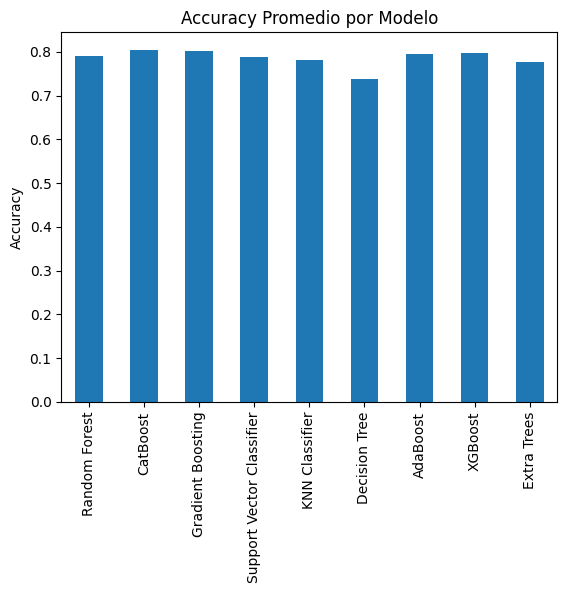

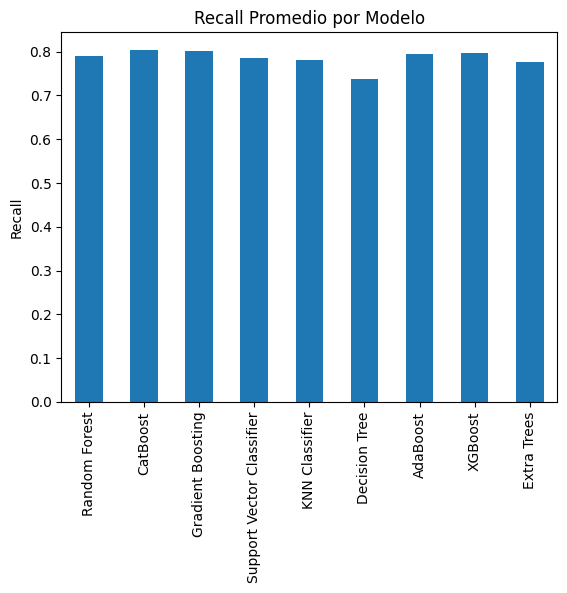

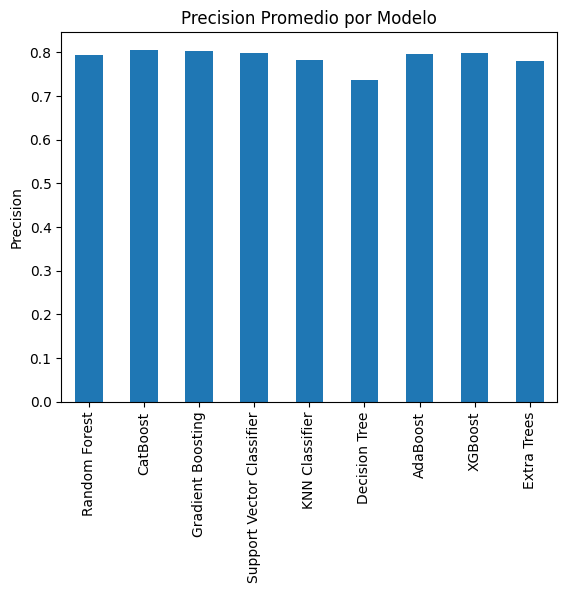

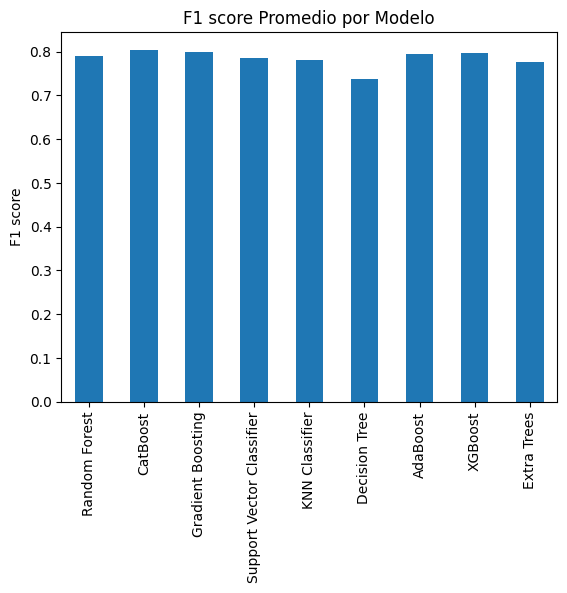

In [ ]:
# 4. Análisis y visualización de métricas individuales -----------------------------------------------------------------------------------------------
# Calcular promedios para cada métrica
acc_mean = acc_df.mean()
rec_mean = rec_df.mean()
pres_mean = pres_df.mean()
f1_mean = f1_df.mean()

# Visualizar los resultados
acc_mean.plot(kind='bar', title='Accuracy Promedio por Modelo')
plt.ylabel('Accuracy')
plt.show()

rec_mean.plot(kind='bar', title='Recall Promedio por Modelo')
plt.ylabel('Recall')
plt.show()

pres_mean.plot(kind='bar', title='Precision Promedio por Modelo')
plt.ylabel('Precision')
plt.show()

f1_mean.plot(kind='bar', title='F1 score Promedio por Modelo')
plt.ylabel('F1 score')
plt.show()

Si bien a simple vista no puede observarse una diferencia significativa entre los modelos, hay dos modelos que tienen una clara ventaja: Gradient Boosting y CatBoost.

### Diferencias críticas

Random Forest                5.2
CatBoost                     8.4
Gradient Boosting            7.8
Support Vector Classifier    4.3
KNN Classifier               3.3
Decision Tree                1.0
AdaBoost                     6.2
XGBoost                      6.4
Extra Trees                  2.4
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_plotting.py:498: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  key=lambda x: ranks[list(x)].min()
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_plotting.py:518: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [ranks[i] for i in bar],


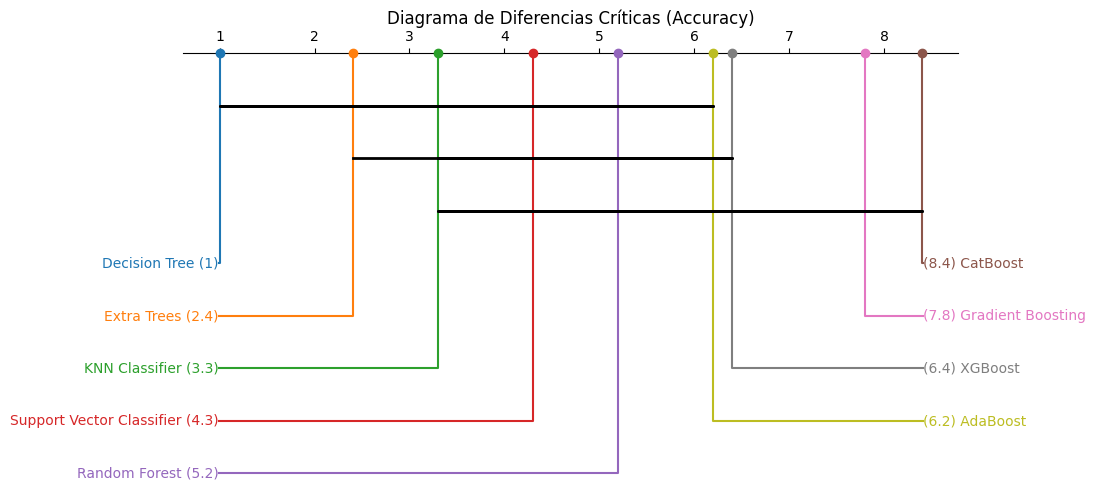

Random Forest                5.2
CatBoost                     8.4
Gradient Boosting            7.8
Support Vector Classifier    4.2
KNN Classifier               3.4
Decision Tree                1.0
AdaBoost                     6.2
XGBoost                      6.4
Extra Trees                  2.4
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_plotting.py:498: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  key=lambda x: ranks[list(x)].min()
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_plotting.py:518: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [ranks[i] for i in bar],


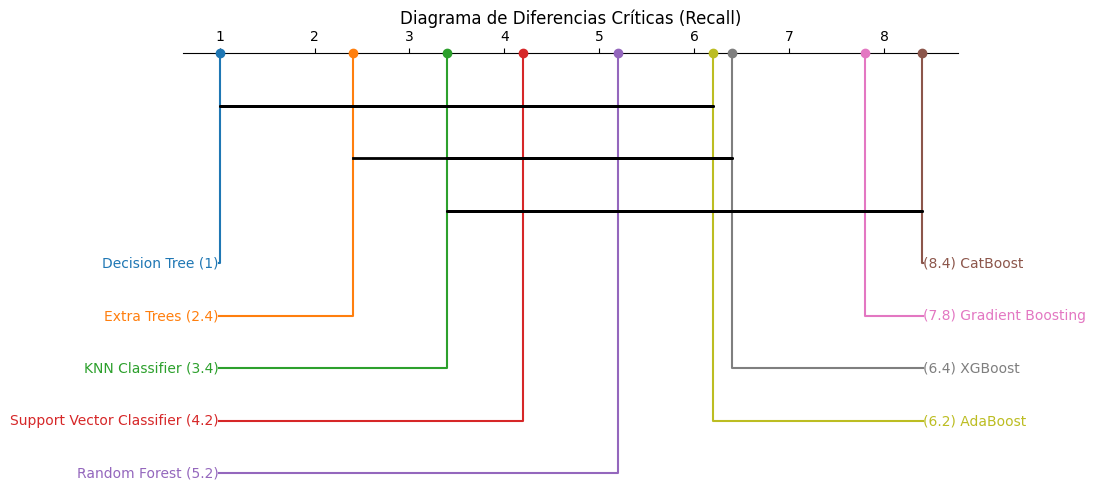

Random Forest                4.8
CatBoost                     8.0
Gradient Boosting            7.4
Support Vector Classifier    6.4
KNN Classifier               2.6
Decision Tree                1.0
AdaBoost                     6.0
XGBoost                      6.0
Extra Trees                  2.8
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_plotting.py:498: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  key=lambda x: ranks[list(x)].min()
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_plotting.py:518: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [ranks[i] for i in bar],


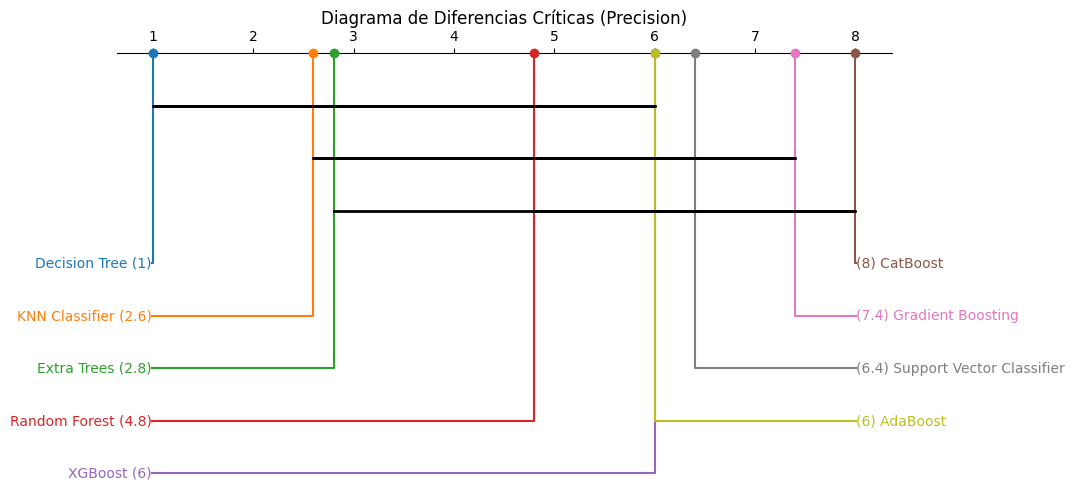

Random Forest                5.2
CatBoost                     8.4
Gradient Boosting            7.8
Support Vector Classifier    4.0
KNN Classifier               3.4
Decision Tree                1.0
AdaBoost                     6.2
XGBoost                      6.6
Extra Trees                  2.4
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_plotting.py:498: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  key=lambda x: ranks[list(x)].min()
/usr/local/lib/python3.10/dist-packages/scikit_posthocs/_plotting.py:518: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [ranks[i] for i in bar],


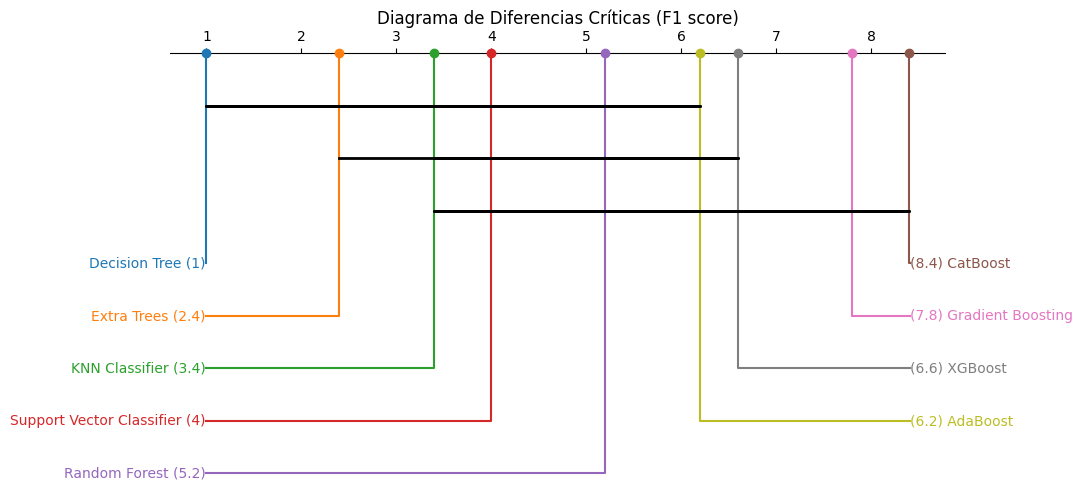

In [ ]:
# 5. Análisis de diferencias críticas -----------------------------------------------------------------------------------------------------------------
# Función para calcular y visualizar diferencias críticas entre modelos usando la librería de scikit-posthocs
def calcular_diferencias_criticas(df, metric_name):
    try:
        # Calcular los rangos de los modelos
        avg_rank = df.rank(axis=1).mean(axis=0)
        print(avg_rank)

        # Realizar una prueba de Nemenyi post-hoc
        cd_result = sp.posthoc_nemenyi_friedman(df.values)

        # Graficar el diagrama de diferencias críticas
        plt.figure(figsize=(10, 6), dpi=100)
        plt.title(f'Diagrama de Diferencias Críticas ({metric_name})')
        sp.critical_difference_diagram(avg_rank, cd_result)
        plt.show()

    except ValueError as e:
        print(f"Error al calcular diferencias críticas para {metric_name}: {e}")

# Calcular y graficar las diferencias críticas para cada métrica
calcular_diferencias_criticas(acc_df, 'Accuracy')
calcular_diferencias_criticas(rec_df, 'Recall')
calcular_diferencias_criticas(pres_df, 'Precision')
calcular_diferencias_criticas(f1_df, 'F1 score')

 En estas gráficas puede observarse una clara ventaja por parte del Catboost, por lo que fue el modelo elegido.
 Aunque es importante mencionar que se entrenaron modelos de MLPClassifier (Red neuronal de perceptrones) y Gradient Boosting, pero como era de esperarse, el que entregó mejores resultados fue Catboost.

### Comparación bayesiana

Comparación bayesiana entre Random Forest y CatBoost en Accuracy: (0.005262706745055135, 0.9947372932549449)


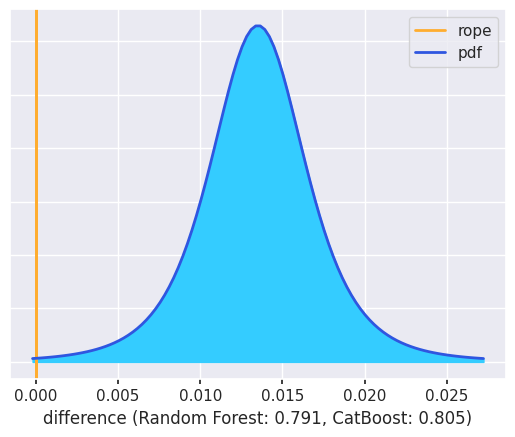

Comparación bayesiana entre Random Forest y Gradient Boosting en Accuracy: (0.012902973886475544, 0.9870970261135245)


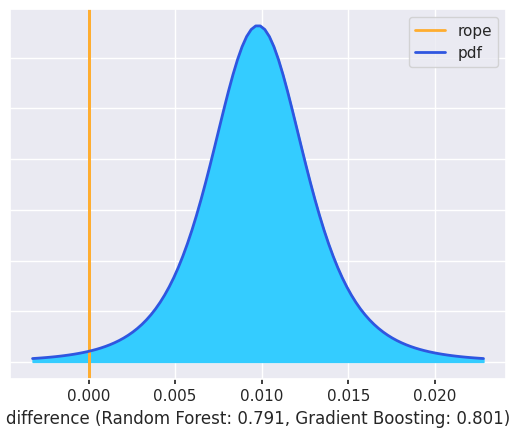

Comparación bayesiana entre Random Forest y Support Vector Classifier en Accuracy: (0.6713128830241458, 0.3286871169758542)


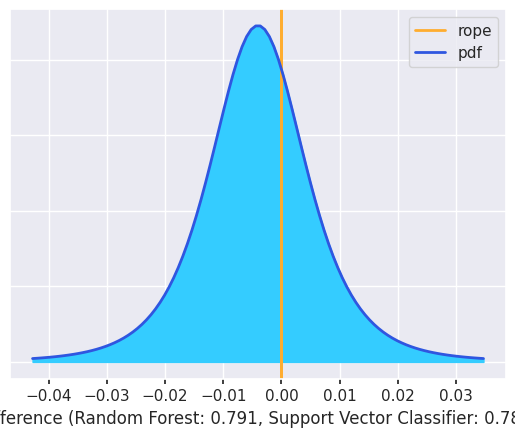

Comparación bayesiana entre Random Forest y KNN Classifier en Accuracy: (0.9651301537750898, 0.034869846224910184)


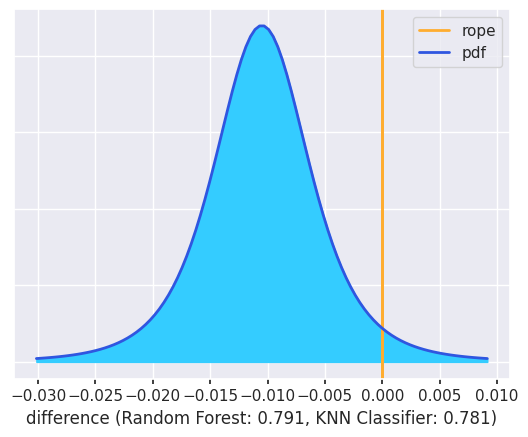

Comparación bayesiana entre Random Forest y Decision Tree en Accuracy: (0.9967778495243627, 0.003222150475637342)


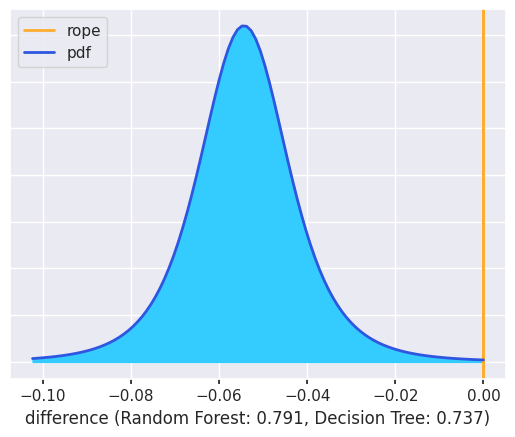

Comparación bayesiana entre Random Forest y AdaBoost en Accuracy: (0.27759142129706593, 0.7224085787029341)


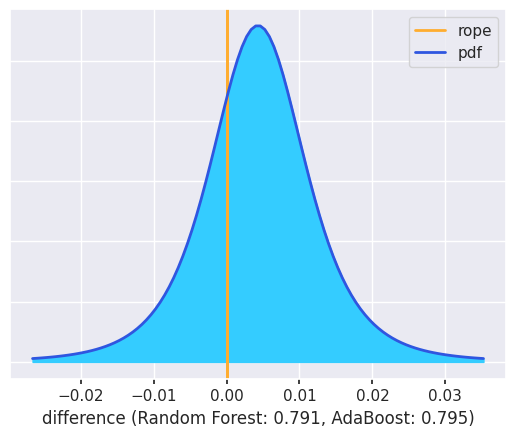

Comparación bayesiana entre Random Forest y XGBoost en Accuracy: (0.16467287337307324, 0.8353271266269268)


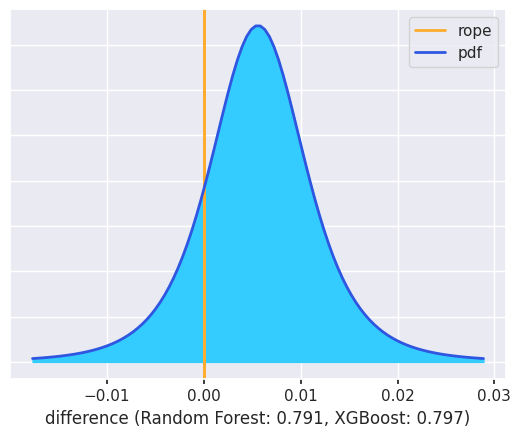

Comparación bayesiana entre Random Forest y Extra Trees en Accuracy: (0.9939973722313274, 0.006002627768672553)


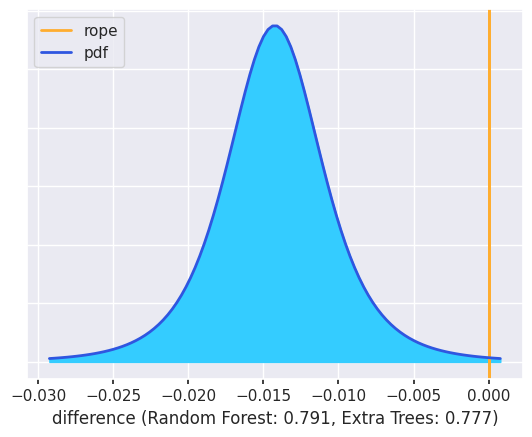

Comparación bayesiana entre CatBoost y Gradient Boosting en Accuracy: (0.7727665024505082, 0.22723349754949185)


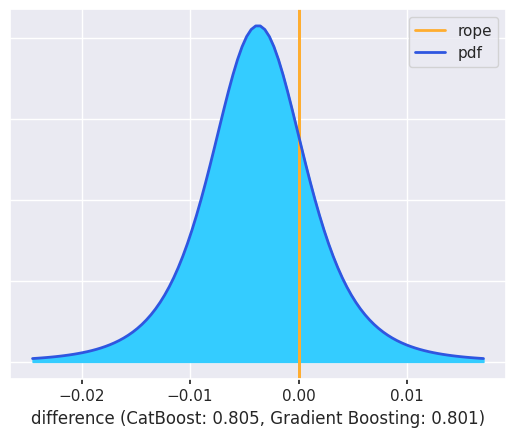

Comparación bayesiana entre CatBoost y Support Vector Classifier en Accuracy: (0.9245604038014339, 0.0754395961985661)


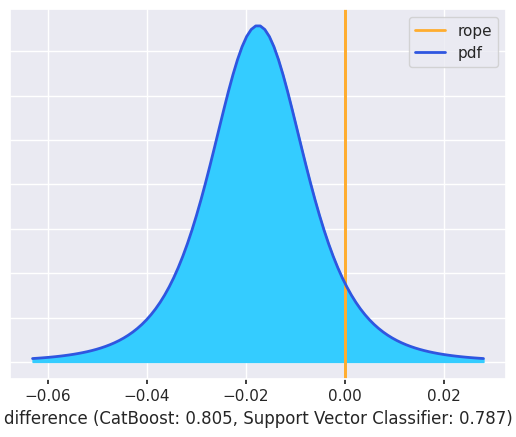

Comparación bayesiana entre CatBoost y KNN Classifier en Accuracy: (0.9927592053794129, 0.007240794620587132)


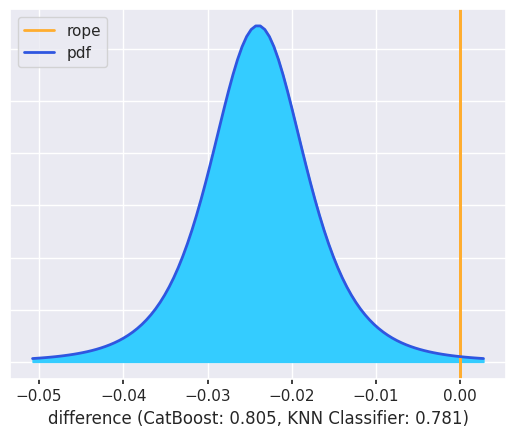

Comparación bayesiana entre CatBoost y Decision Tree en Accuracy: (0.9982015466947359, 0.0017984533052640694)


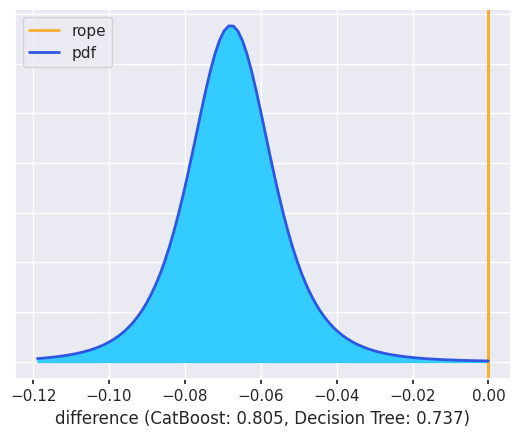

Comparación bayesiana entre CatBoost y AdaBoost en Accuracy: (0.8487450314752508, 0.15125496852474918)


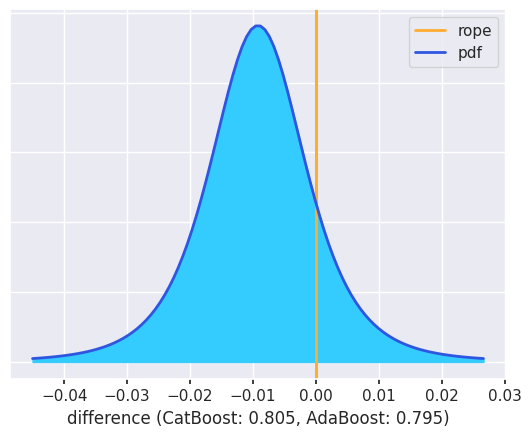

Comparación bayesiana entre CatBoost y XGBoost en Accuracy: (0.9696788847153688, 0.030321115284631217)


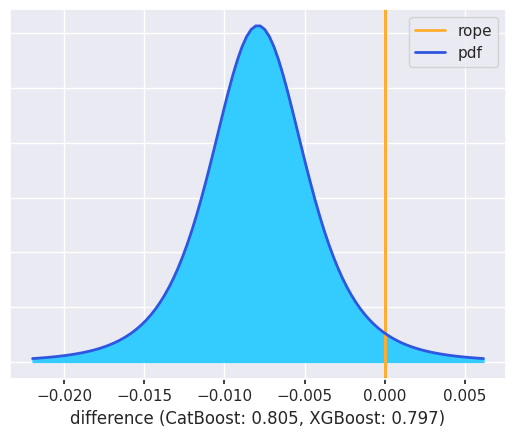

Comparación bayesiana entre CatBoost y Extra Trees en Accuracy: (0.9959617191482478, 0.004038280851752174)


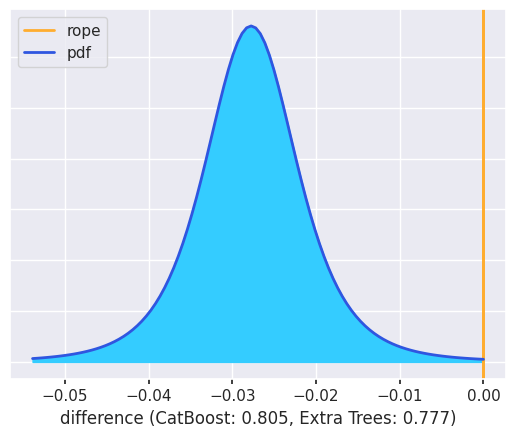

Comparación bayesiana entre Gradient Boosting y Support Vector Classifier en Accuracy: (0.9460674078764045, 0.05393259212359547)


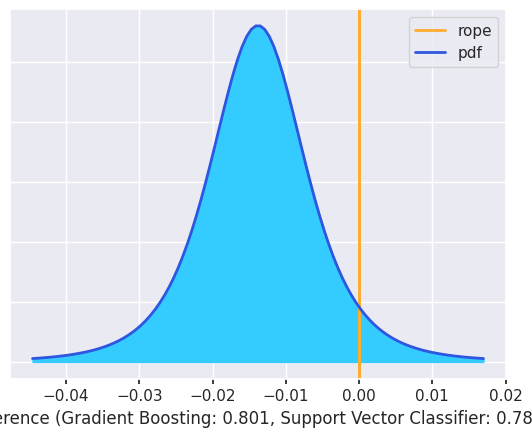

Comparación bayesiana entre Gradient Boosting y KNN Classifier en Accuracy: (0.9878178016540631, 0.012182198345936923)


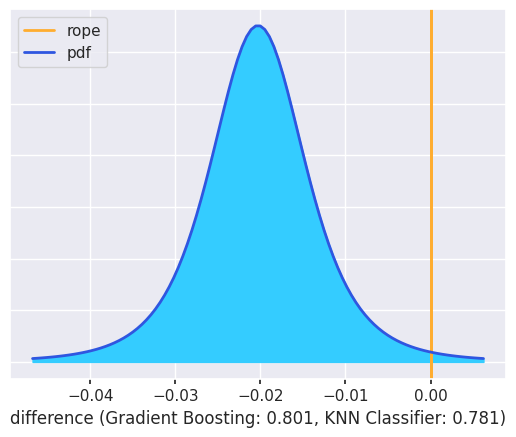

Comparación bayesiana entre Gradient Boosting y Decision Tree en Accuracy: (0.9959584915898296, 0.004041508410170369)


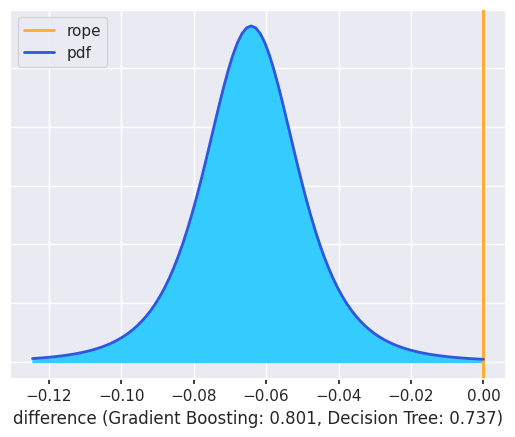

Comparación bayesiana entre Gradient Boosting y AdaBoost en Accuracy: (0.8409386808322288, 0.15906131916777122)


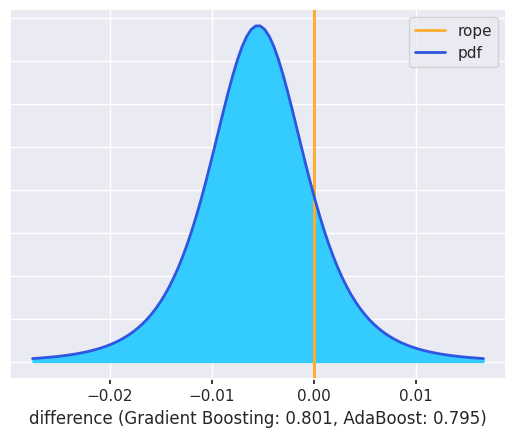

Comparación bayesiana entre Gradient Boosting y XGBoost en Accuracy: (0.7122549363423666, 0.2877450636576334)


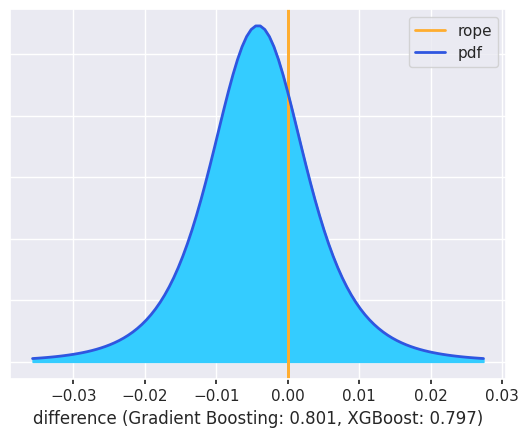

Comparación bayesiana entre Gradient Boosting y Extra Trees en Accuracy: (0.9948193564480186, 0.005180643551981445)


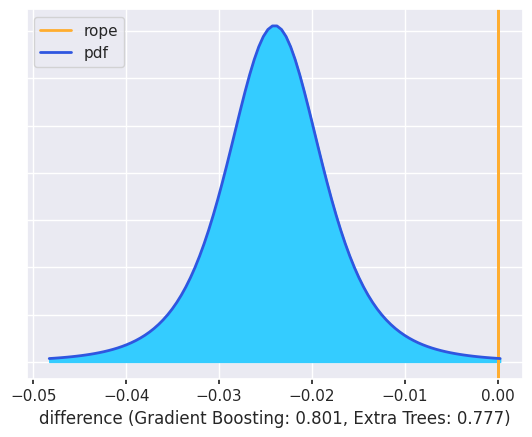

Comparación bayesiana entre Support Vector Classifier y KNN Classifier en Accuracy: (0.7585920109554039, 0.24140798904459615)


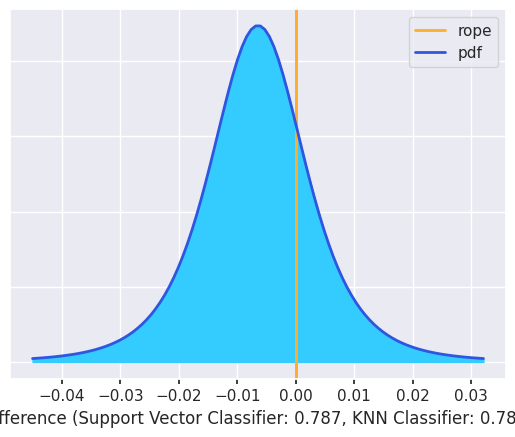

Comparación bayesiana entre Support Vector Classifier y Decision Tree en Accuracy: (0.9785810009378249, 0.021418999062175148)


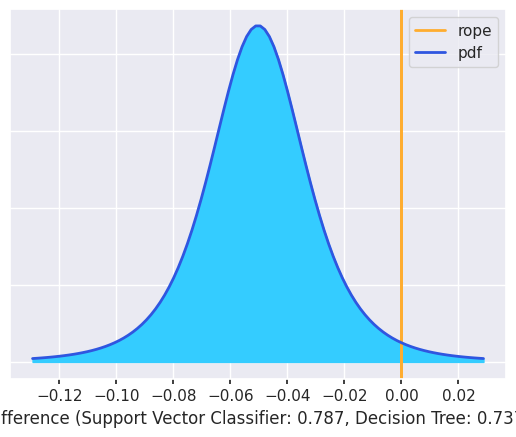

Comparación bayesiana entre Support Vector Classifier y AdaBoost en Accuracy: (0.07352456092432225, 0.9264754390756778)


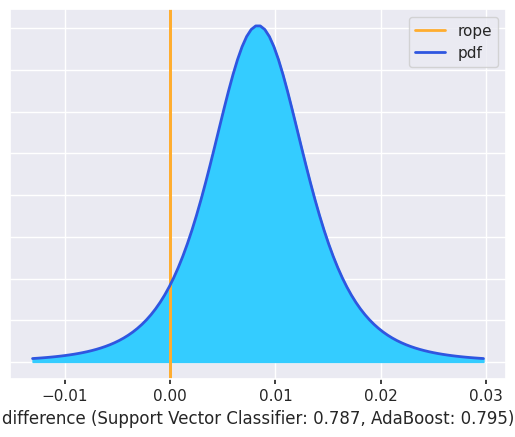

Comparación bayesiana entre Support Vector Classifier y XGBoost en Accuracy: (0.22920298834202535, 0.7707970116579747)


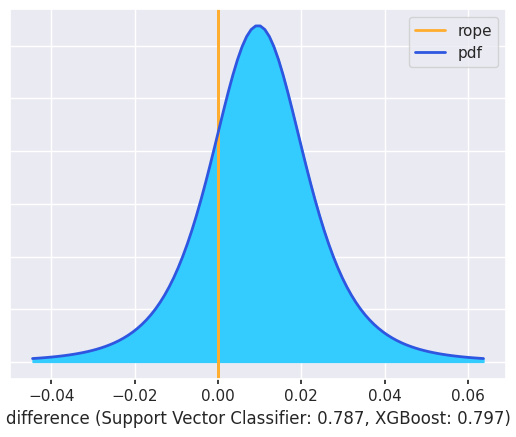

Comparación bayesiana entre Support Vector Classifier y Extra Trees en Accuracy: (0.8160729517879521, 0.18392704821204786)


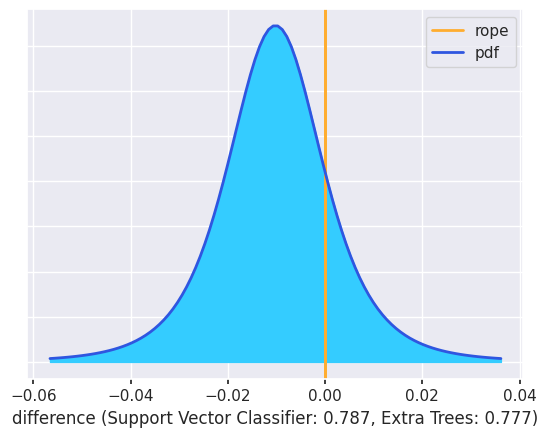

Comparación bayesiana entre KNN Classifier y Decision Tree en Accuracy: (0.9952721941637737, 0.00472780583622634)


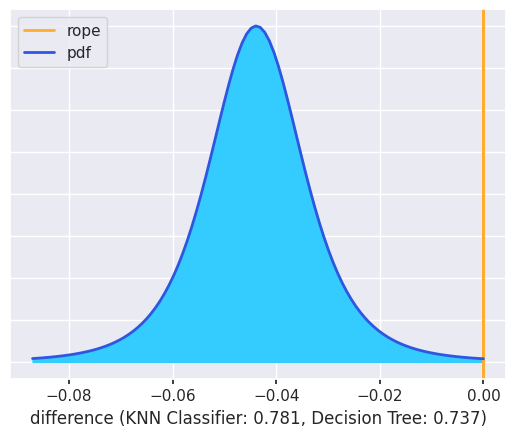

Comparación bayesiana entre KNN Classifier y AdaBoost en Accuracy: (0.08668944232186393, 0.9133105576781361)


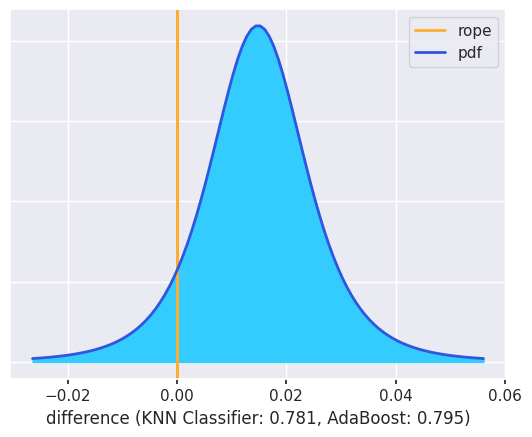

Comparación bayesiana entre KNN Classifier y XGBoost en Accuracy: (0.026251790053020918, 0.9737482099469791)


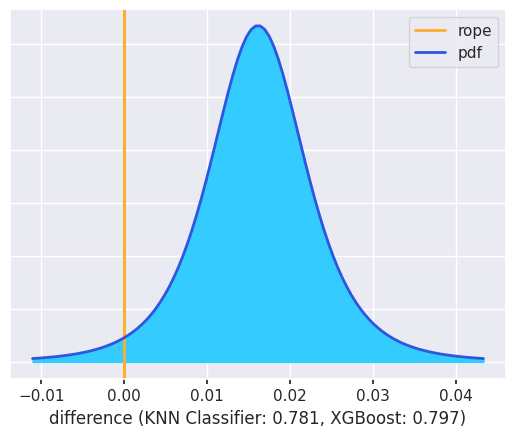

Comparación bayesiana entre KNN Classifier y Extra Trees en Accuracy: (0.7941342478031018, 0.20586575219689818)


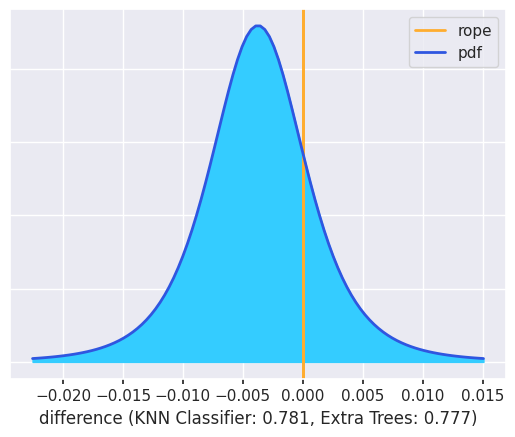

Comparación bayesiana entre Decision Tree y AdaBoost en Accuracy: (0.011913810845273876, 0.9880861891547261)


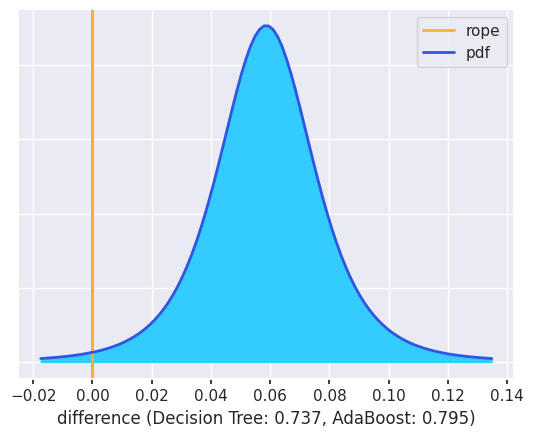

Comparación bayesiana entre Decision Tree y XGBoost en Accuracy: (0.0020113423385300644, 0.9979886576614699)


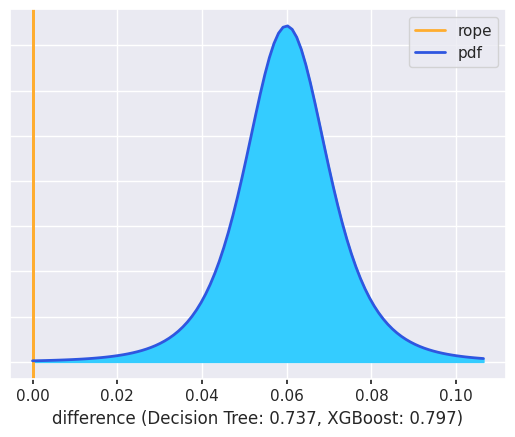

Comparación bayesiana entre Decision Tree y Extra Trees en Accuracy: (0.004067866275350274, 0.9959321337246497)


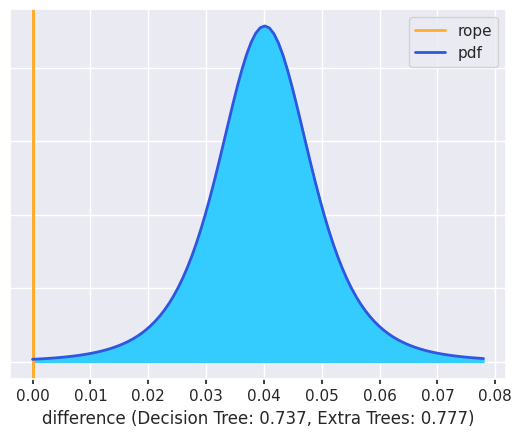

Comparación bayesiana entre AdaBoost y XGBoost en Accuracy: (0.4539673599994529, 0.5460326400005471)


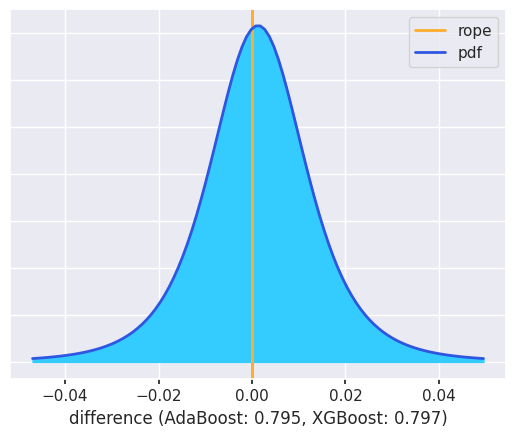

Comparación bayesiana entre AdaBoost y Extra Trees en Accuracy: (0.9439043634342051, 0.05609563656579486)


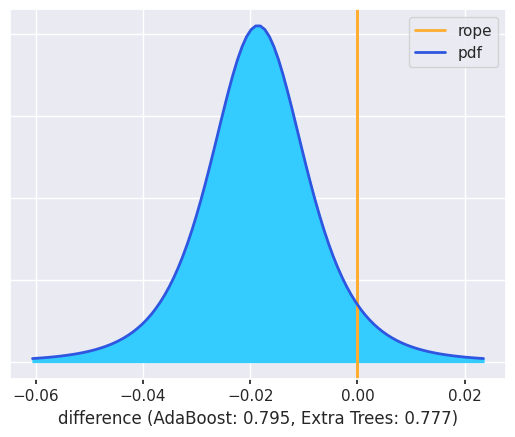

Comparación bayesiana entre XGBoost y Extra Trees en Accuracy: (0.9804026161301799, 0.01959738386982013)


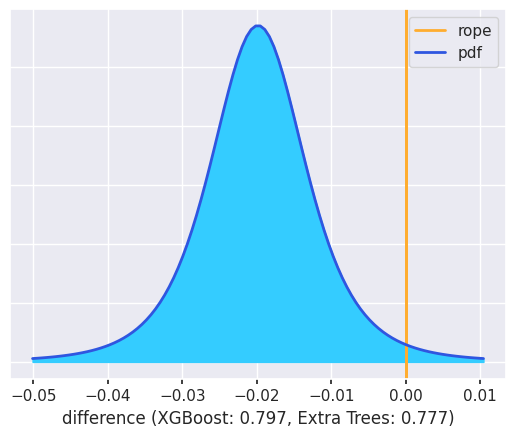

Comparación bayesiana entre Random Forest y CatBoost en Recall: (0.00582504974867637, 0.9941749502513236)


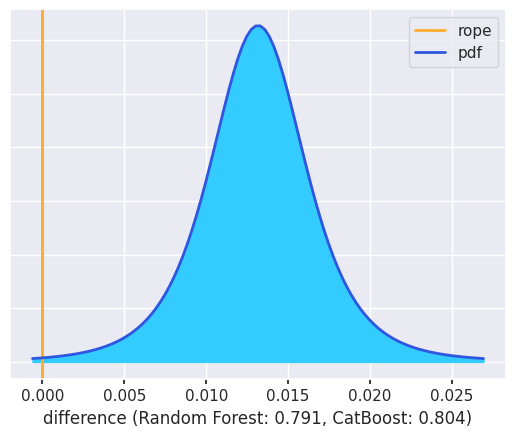

Comparación bayesiana entre Random Forest y Gradient Boosting en Recall: (0.014912747230005574, 0.9850872527699944)


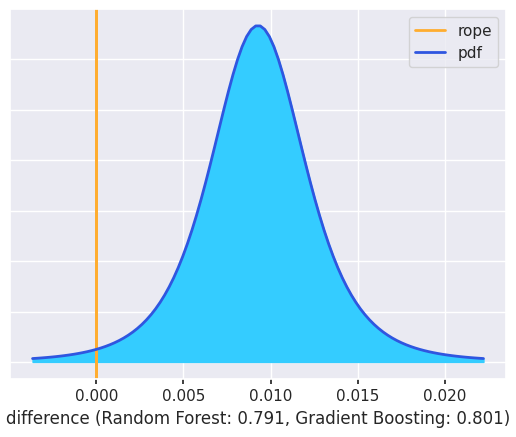

Comparación bayesiana entre Random Forest y Support Vector Classifier en Recall: (0.7042805695979204, 0.2957194304020796)


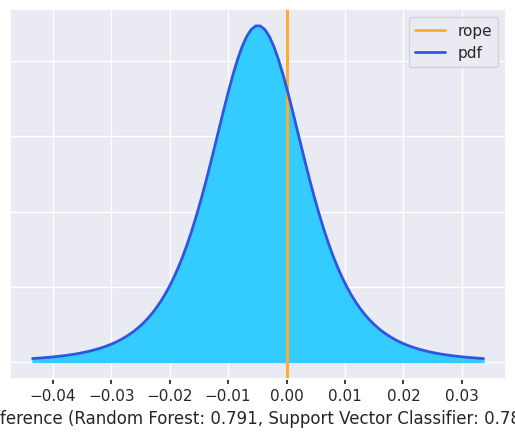

Comparación bayesiana entre Random Forest y KNN Classifier en Recall: (0.9679061136066061, 0.032093886393393944)


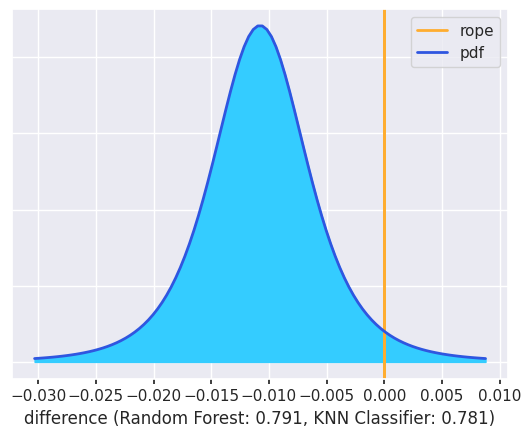

Comparación bayesiana entre Random Forest y Decision Tree en Recall: (0.9967629602619852, 0.003237039738014813)


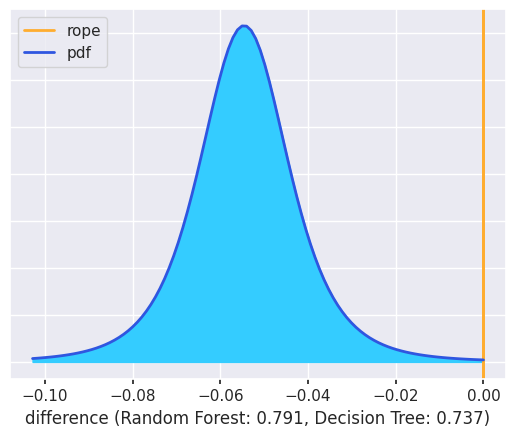

Comparación bayesiana entre Random Forest y AdaBoost en Recall: (0.2952398528381346, 0.7047601471618654)


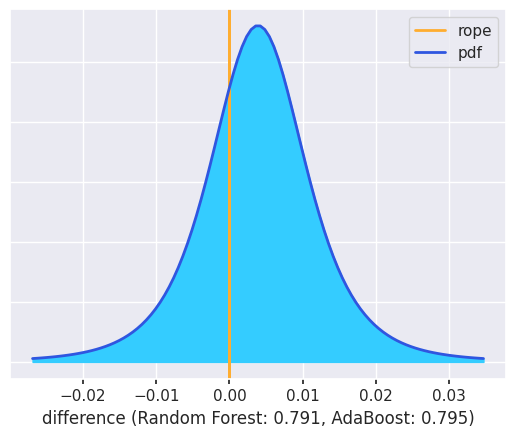

Comparación bayesiana entre Random Forest y XGBoost en Recall: (0.1743448263394337, 0.8256551736605663)


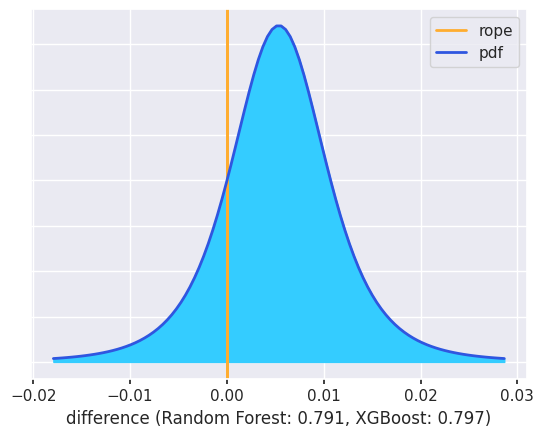

Comparación bayesiana entre Random Forest y Extra Trees en Recall: (0.9937035566498127, 0.0062964433501873085)


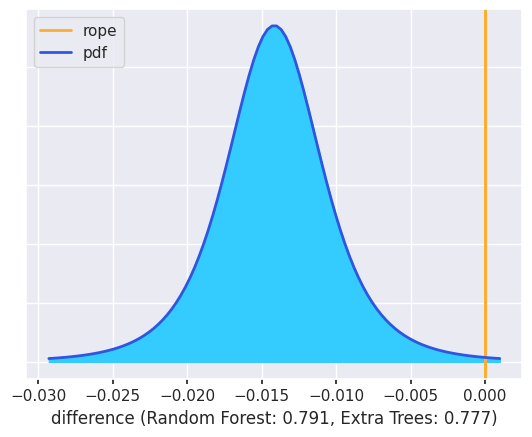

Comparación bayesiana entre CatBoost y Gradient Boosting en Recall: (0.7801390351789916, 0.21986096482100836)


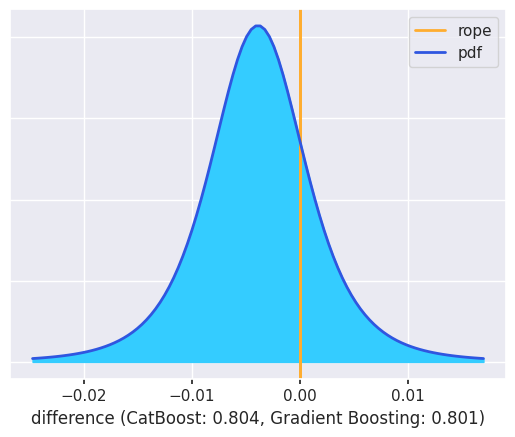

Comparación bayesiana entre CatBoost y Support Vector Classifier en Recall: (0.9288779870361593, 0.07112201296384069)


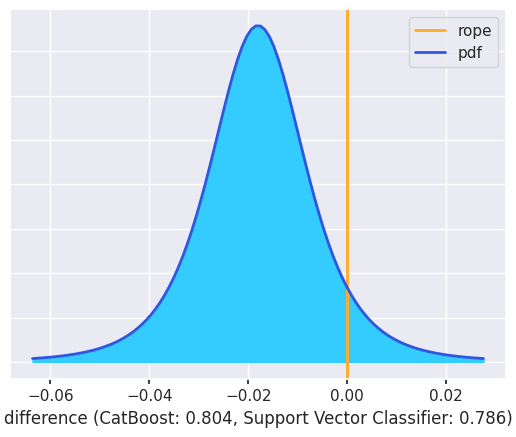

Comparación bayesiana entre CatBoost y KNN Classifier en Recall: (0.9928139634429693, 0.007186036557030651)


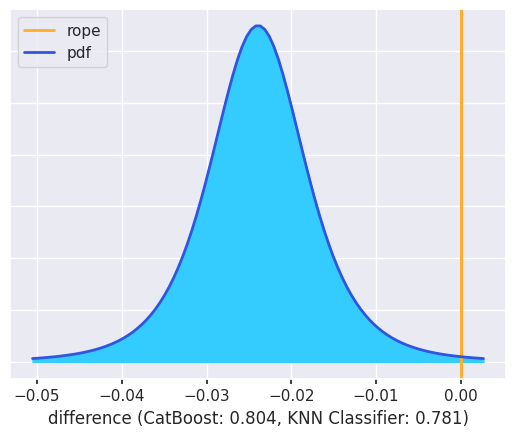

Comparación bayesiana entre CatBoost y Decision Tree en Recall: (0.9981700908768656, 0.00182990912313441)


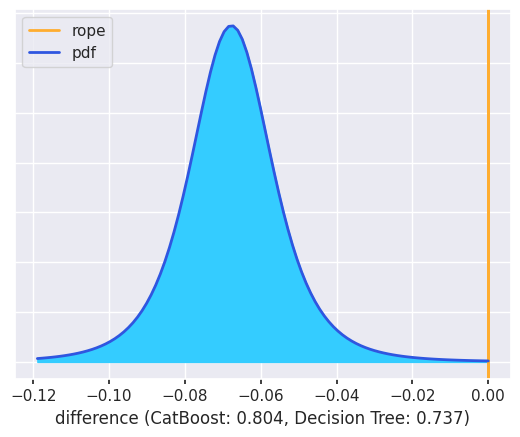

Comparación bayesiana entre CatBoost y AdaBoost en Recall: (0.8494225672226139, 0.1505774327773861)


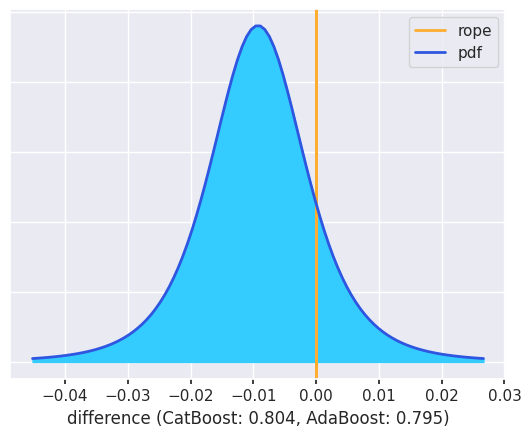

Comparación bayesiana entre CatBoost y XGBoost en Recall: (0.9685399637163329, 0.031460036283667114)


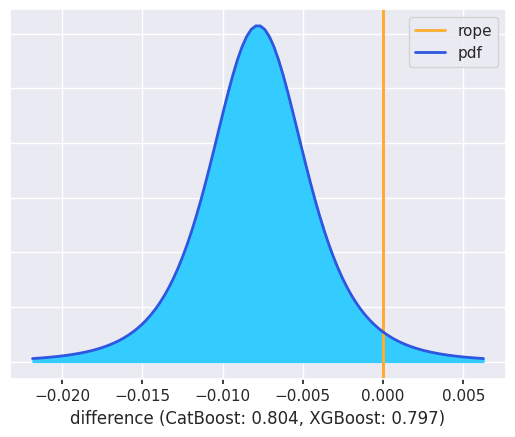

Comparación bayesiana entre CatBoost y Extra Trees en Recall: (0.9957164303609676, 0.004283569639032425)


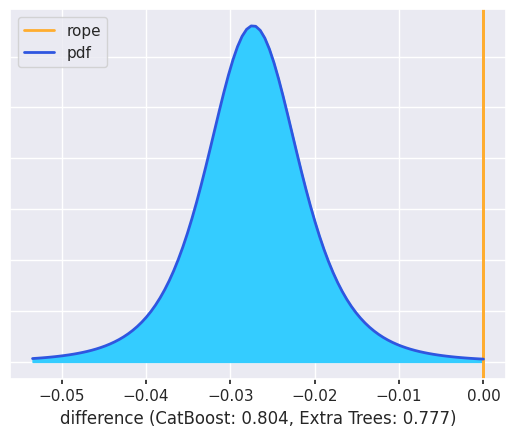

Comparación bayesiana entre Gradient Boosting y Support Vector Classifier en Recall: (0.9493880311407112, 0.05061196885928876)


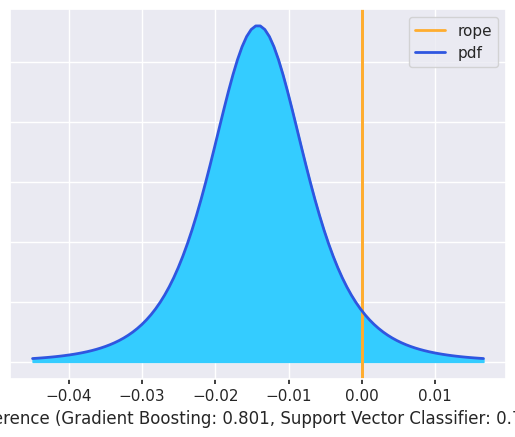

Comparación bayesiana entre Gradient Boosting y KNN Classifier en Recall: (0.9874518499161856, 0.01254815008381438)


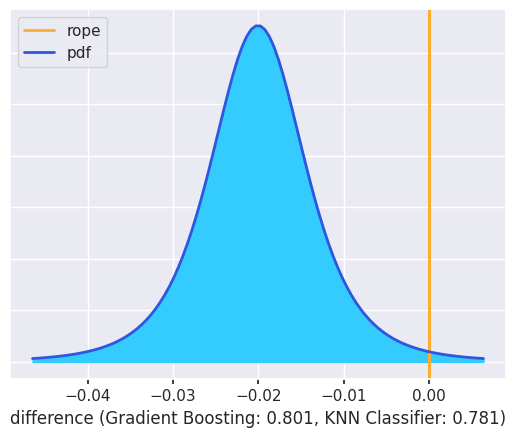

Comparación bayesiana entre Gradient Boosting y Decision Tree en Recall: (0.9958548008192079, 0.004145199180792147)


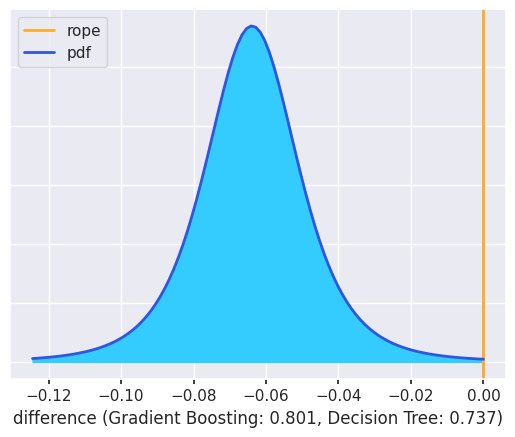

Comparación bayesiana entre Gradient Boosting y AdaBoost en Recall: (0.8370014554152649, 0.16299854458473506)


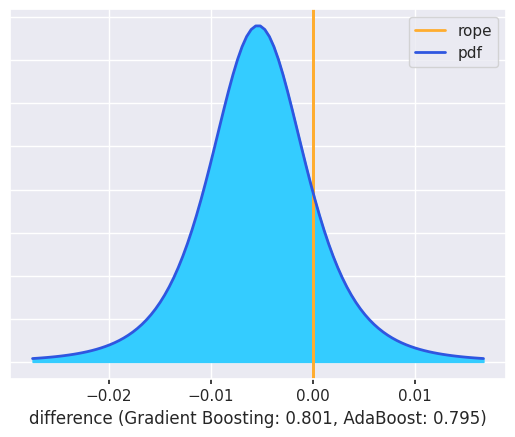

Comparación bayesiana entre Gradient Boosting y XGBoost en Recall: (0.7009681936276202, 0.2990318063723798)


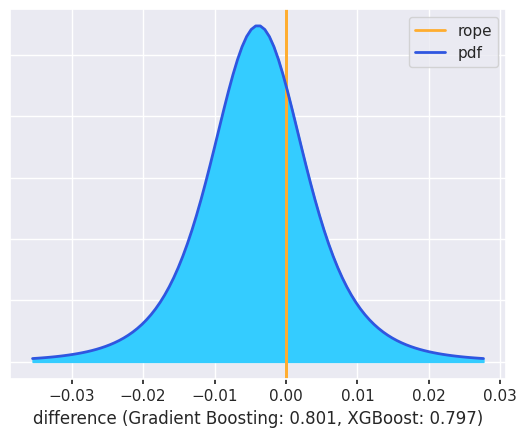

Comparación bayesiana entre Gradient Boosting y Extra Trees en Recall: (0.9942825653448086, 0.005717434655191367)


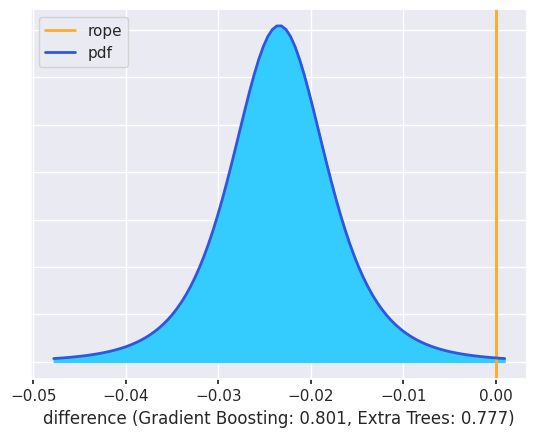

Comparación bayesiana entre Support Vector Classifier y KNN Classifier en Recall: (0.7395706663594845, 0.26042933364051546)


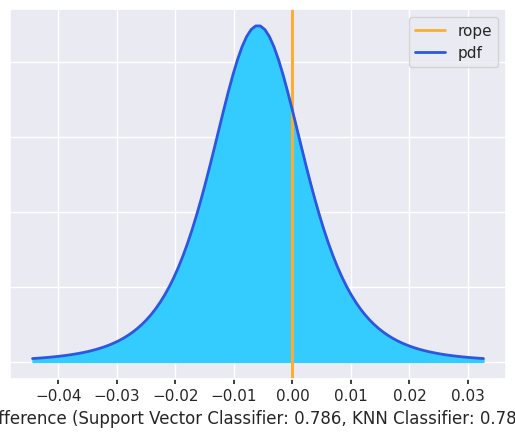

Comparación bayesiana entre Support Vector Classifier y Decision Tree en Recall: (0.9777259805486749, 0.022274019451325122)


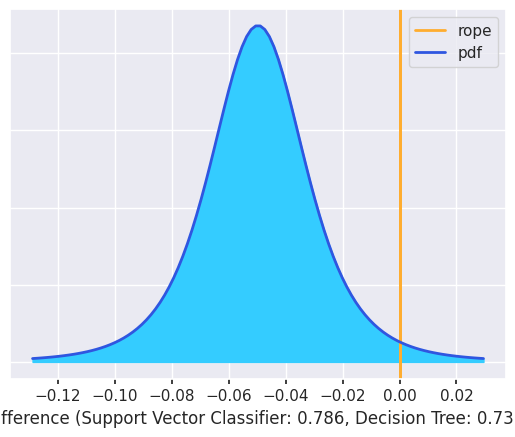

Comparación bayesiana entre Support Vector Classifier y AdaBoost en Recall: (0.06563409538717535, 0.9343659046128246)


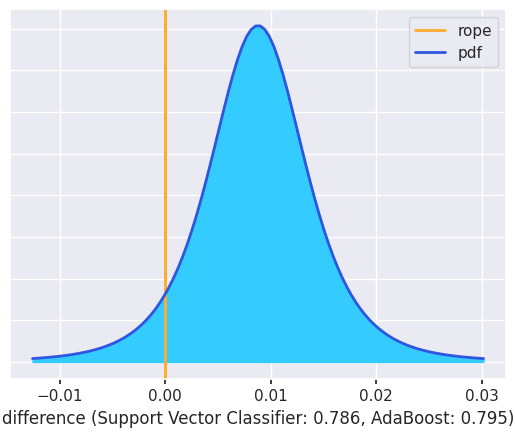

Comparación bayesiana entre Support Vector Classifier y XGBoost en Recall: (0.21609133415249482, 0.7839086658475052)


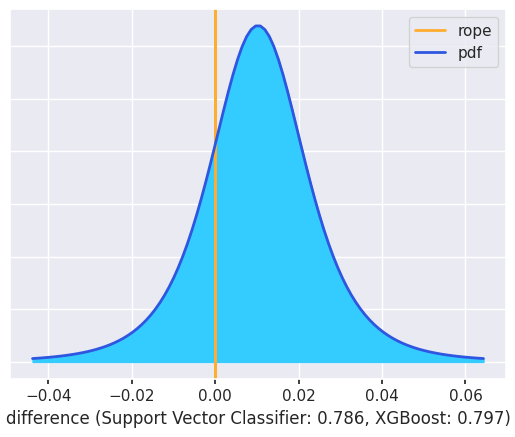

Comparación bayesiana entre Support Vector Classifier y Extra Trees en Recall: (0.7951348000555833, 0.20486519994441665)


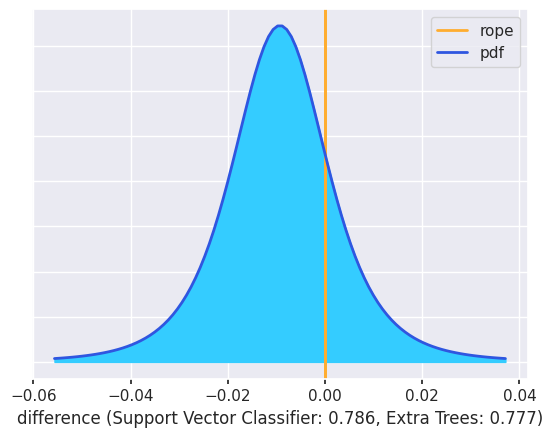

Comparación bayesiana entre KNN Classifier y Decision Tree en Recall: (0.9952292588110824, 0.0047707411889176266)


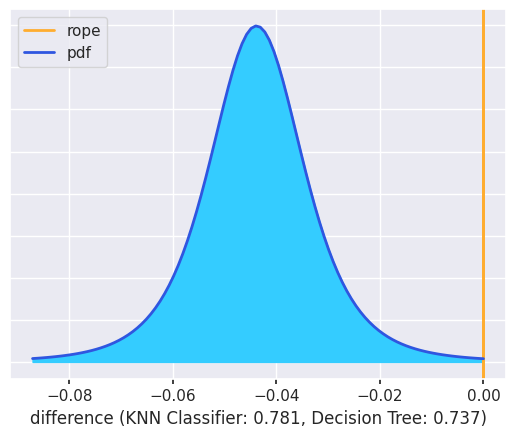

Comparación bayesiana entre KNN Classifier y AdaBoost en Recall: (0.08802462141621303, 0.911975378583787)


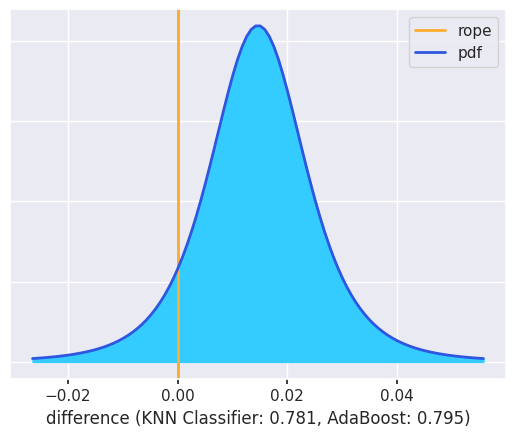

Comparación bayesiana entre KNN Classifier y XGBoost en Recall: (0.025623860694911738, 0.9743761393050883)


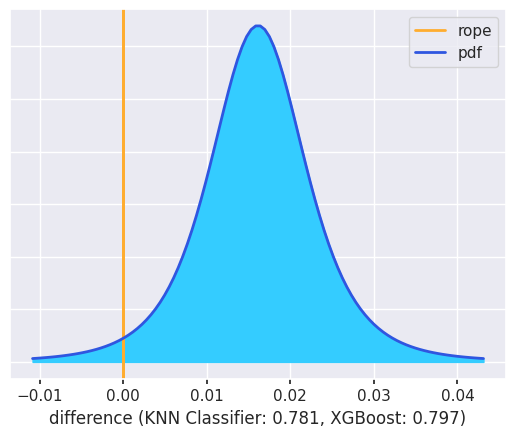

Comparación bayesiana entre KNN Classifier y Extra Trees en Recall: (0.7733868840699007, 0.22661311593009925)


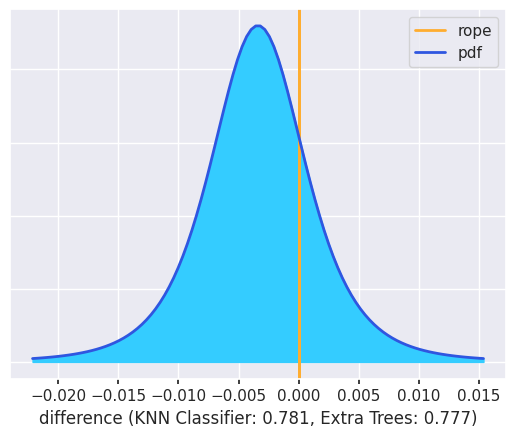

Comparación bayesiana entre Decision Tree y AdaBoost en Recall: (0.012091589237489764, 0.9879084107625102)


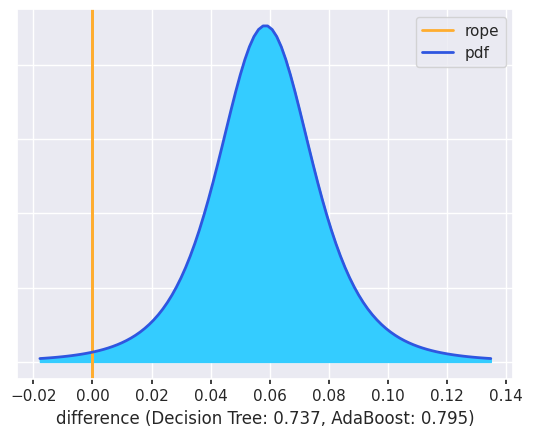

Comparación bayesiana entre Decision Tree y XGBoost en Recall: (0.0020251985534360806, 0.9979748014465639)


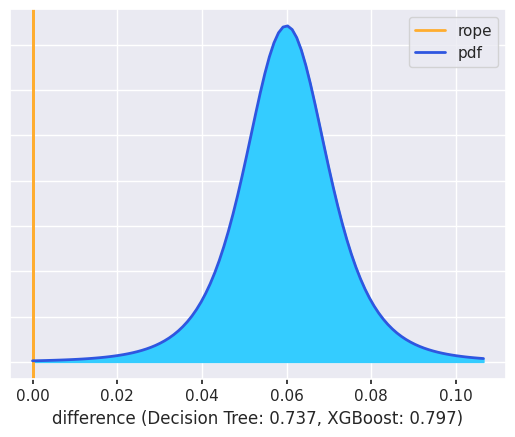

Comparación bayesiana entre Decision Tree y Extra Trees en Recall: (0.003981263482634723, 0.9960187365173653)


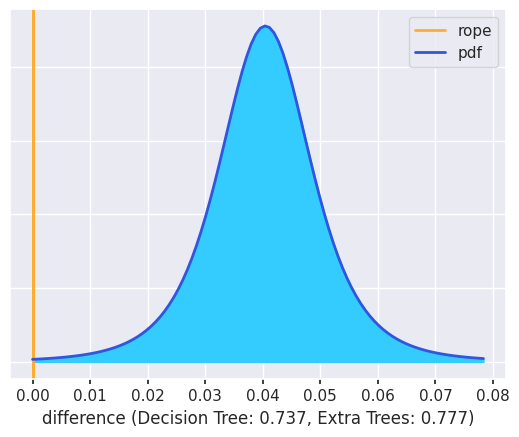

Comparación bayesiana entre AdaBoost y XGBoost en Recall: (0.44819071022362067, 0.5518092897763793)


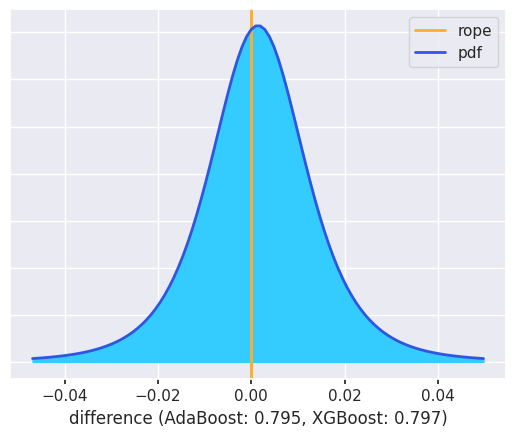

Comparación bayesiana entre AdaBoost y Extra Trees en Recall: (0.940131727719254, 0.05986827228074598)


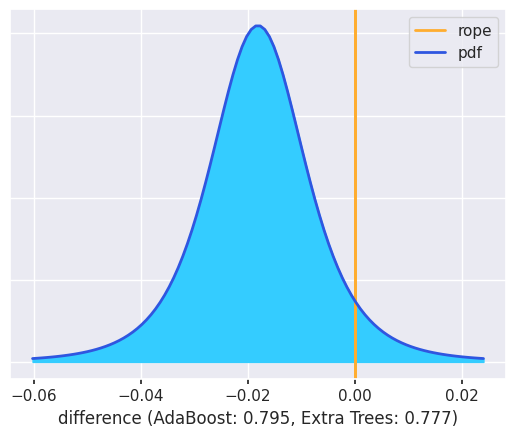

Comparación bayesiana entre XGBoost y Extra Trees en Recall: (0.979577734276482, 0.02042226572351802)


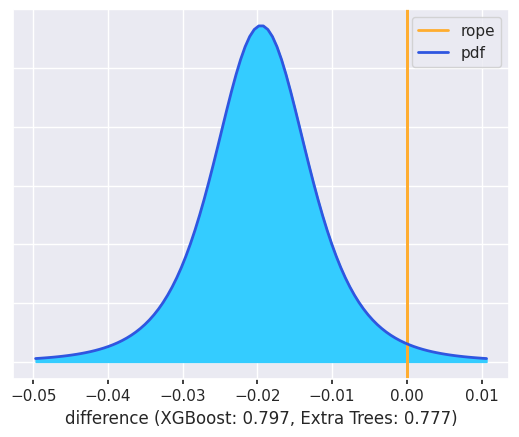

Comparación bayesiana entre Random Forest y CatBoost en Precision: (0.013375529966038746, 0.9866244700339613)


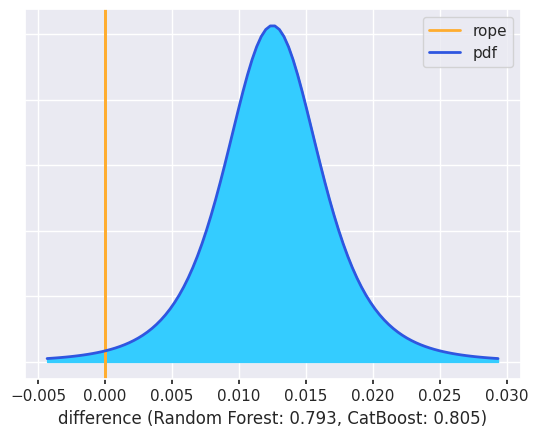

Comparación bayesiana entre Random Forest y Gradient Boosting en Precision: (0.00010528085529648568, 0.9998947191447035)


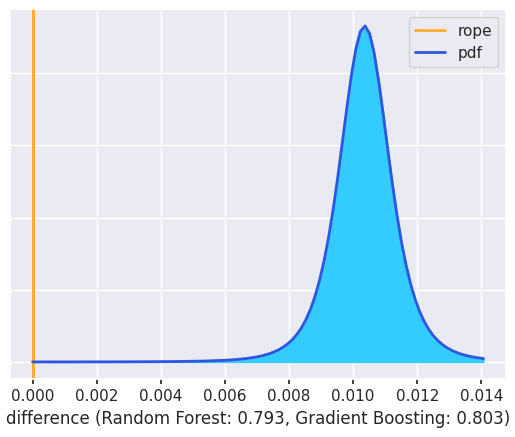

Comparación bayesiana entre Random Forest y Support Vector Classifier en Precision: (0.25290636513661, 0.74709363486339)


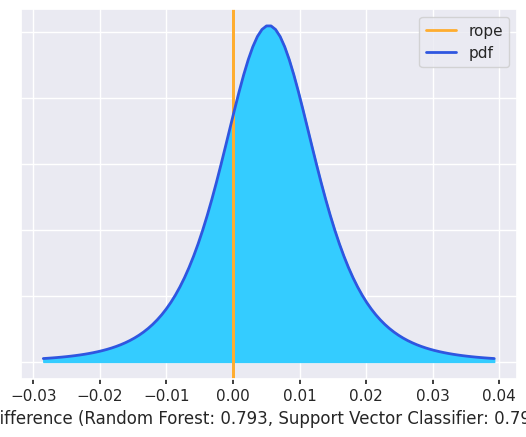

Comparación bayesiana entre Random Forest y KNN Classifier en Precision: (0.9665564305280682, 0.03344356947193183)


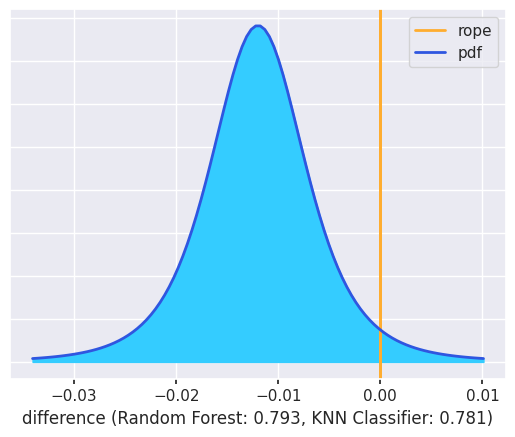

Comparación bayesiana entre Random Forest y Decision Tree en Precision: (0.9959244612483275, 0.004075538751672547)


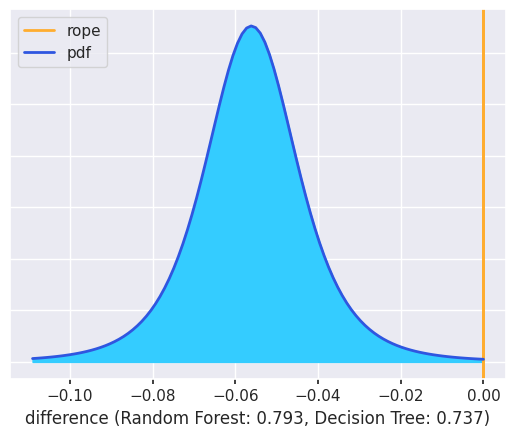

Comparación bayesiana entre Random Forest y AdaBoost en Precision: (0.2770253281571564, 0.7229746718428436)


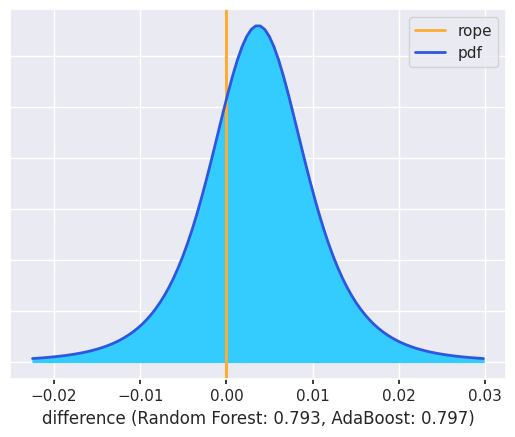

Comparación bayesiana entre Random Forest y XGBoost en Precision: (0.24933706844986725, 0.7506629315501328)


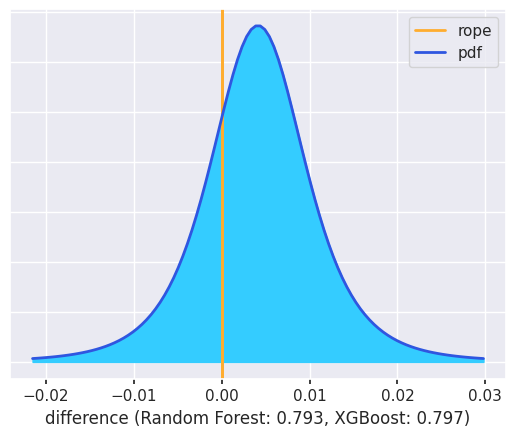

Comparación bayesiana entre Random Forest y Extra Trees en Precision: (0.9906065446710758, 0.009393455328924216)


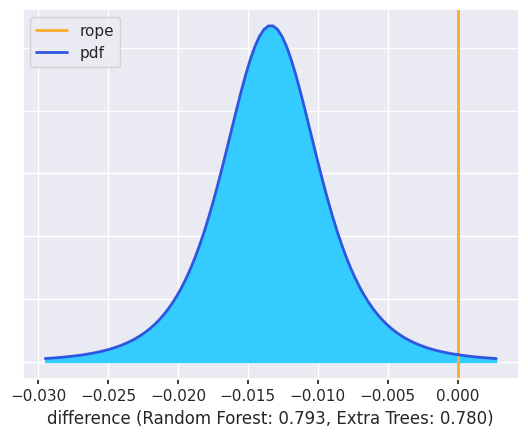

Comparación bayesiana entre CatBoost y Gradient Boosting en Precision: (0.6902983305206107, 0.30970166947938926)


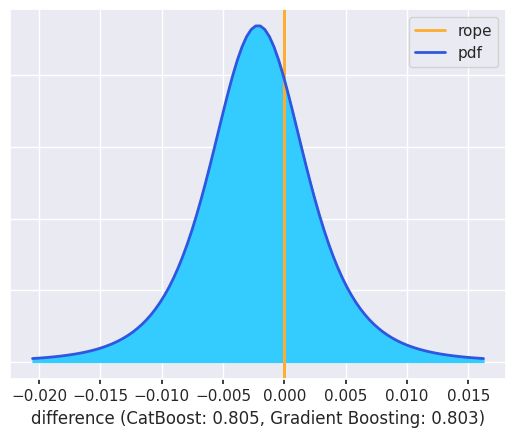

Comparación bayesiana entre CatBoost y Support Vector Classifier en Precision: (0.7621631594136635, 0.23783684058633647)


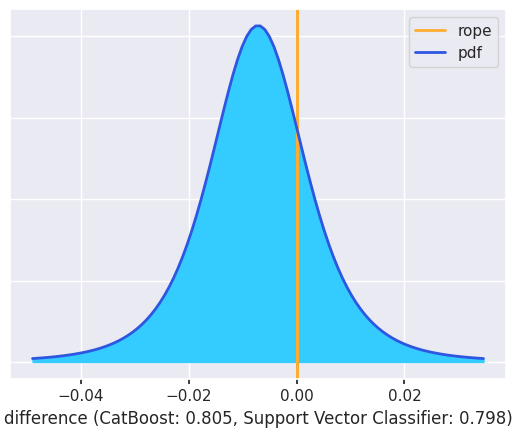

Comparación bayesiana entre CatBoost y KNN Classifier en Precision: (0.9936407736250169, 0.006359226374983096)


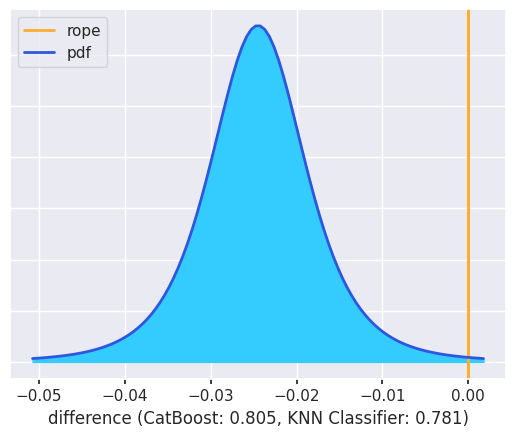

Comparación bayesiana entre CatBoost y Decision Tree en Precision: (0.9986146223116921, 0.0013853776883079316)


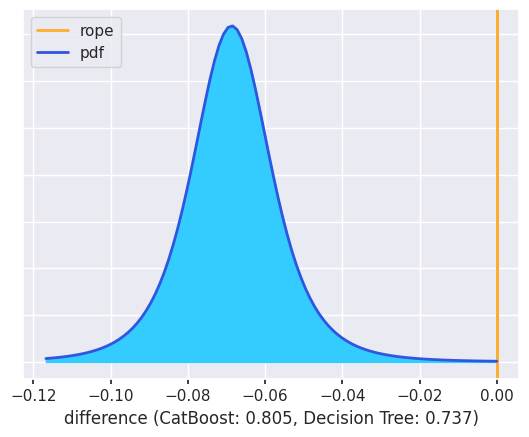

Comparación bayesiana entre CatBoost y AdaBoost en Precision: (0.8457851418572321, 0.15421485814276792)


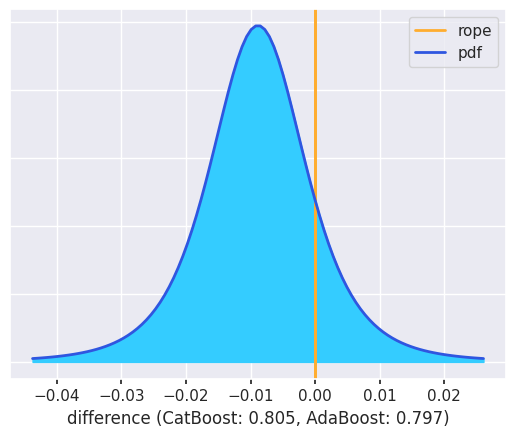

Comparación bayesiana entre CatBoost y XGBoost en Precision: (0.9772392048946918, 0.02276079510530815)


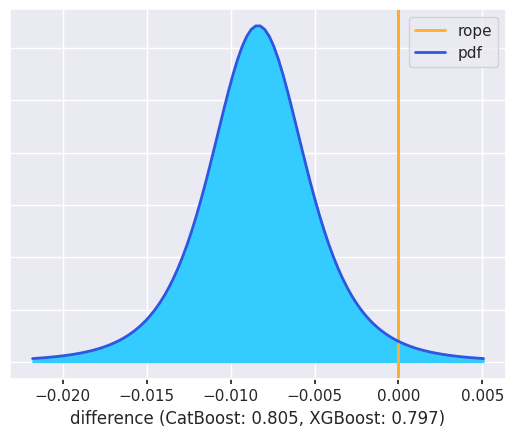

Comparación bayesiana entre CatBoost y Extra Trees en Precision: (0.9956640846802669, 0.004335915319733097)


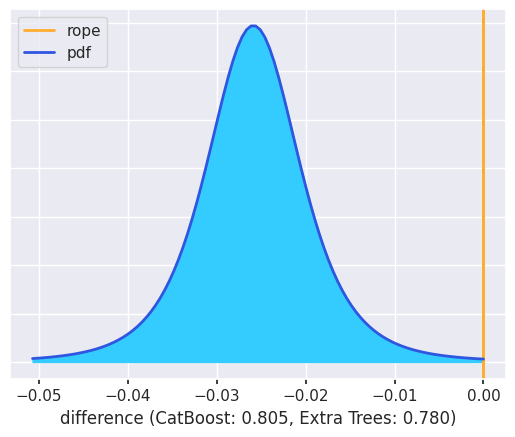

Comparación bayesiana entre Gradient Boosting y Support Vector Classifier en Precision: (0.7479213365969399, 0.25207866340306007)


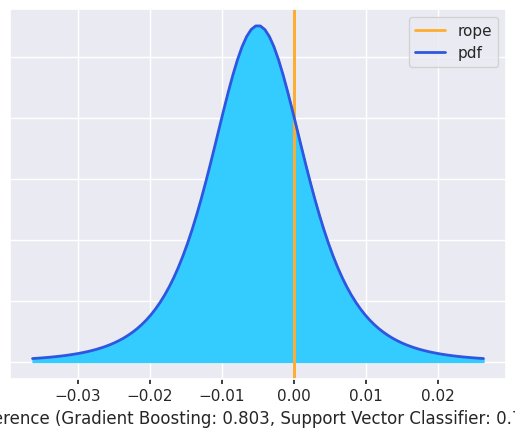

Comparación bayesiana entre Gradient Boosting y KNN Classifier en Precision: (0.9944312065494947, 0.005568793450505316)


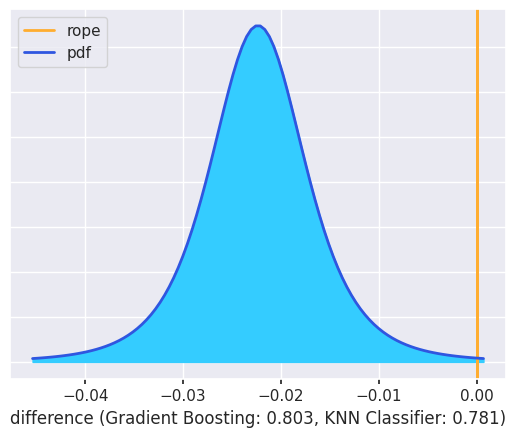

Comparación bayesiana entre Gradient Boosting y Decision Tree en Precision: (0.9975722210514891, 0.0024277789485108725)


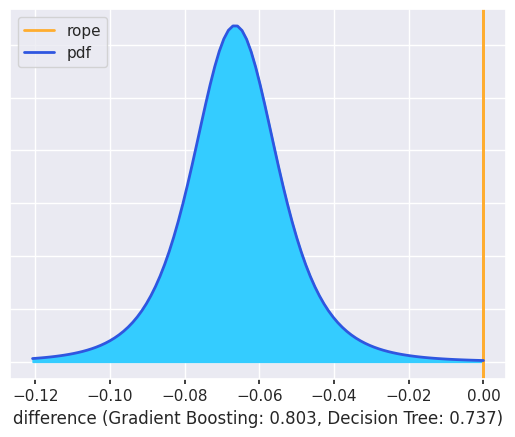

Comparación bayesiana entre Gradient Boosting y AdaBoost en Precision: (0.8747671854890875, 0.1252328145109125)


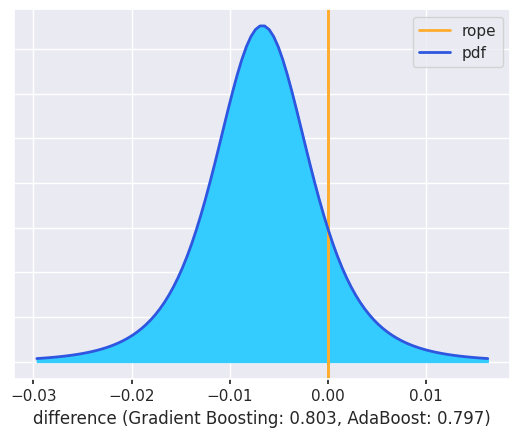

Comparación bayesiana entre Gradient Boosting y XGBoost en Precision: (0.8156516175345394, 0.1843483824654606)


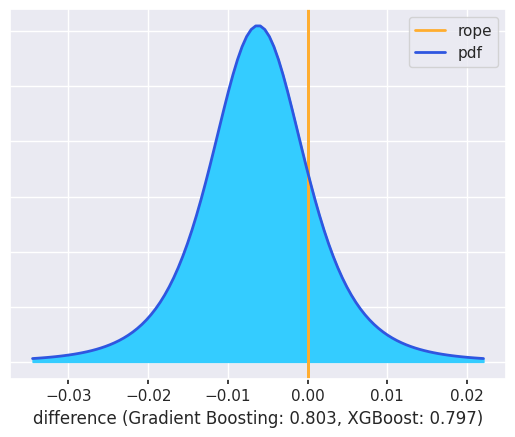

Comparación bayesiana entre Gradient Boosting y Extra Trees en Precision: (0.9982592766222105, 0.0017407233777895215)


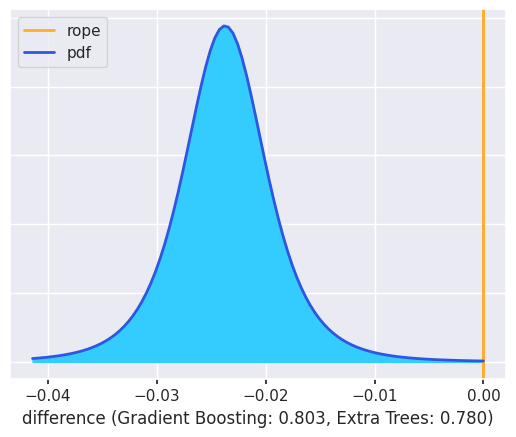

Comparación bayesiana entre Support Vector Classifier y KNN Classifier en Precision: (0.9626368349083916, 0.03736316509160842)


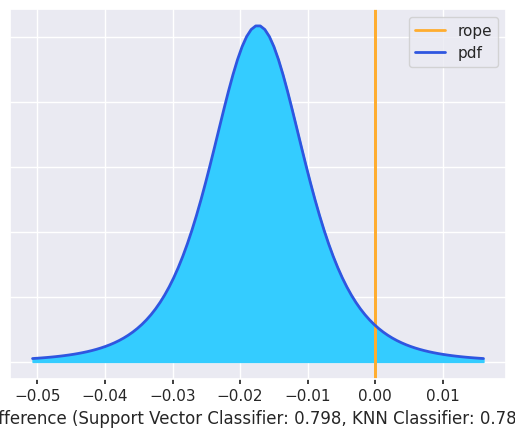

Comparación bayesiana entre Support Vector Classifier y Decision Tree en Precision: (0.9920793364637228, 0.007920663536277184)


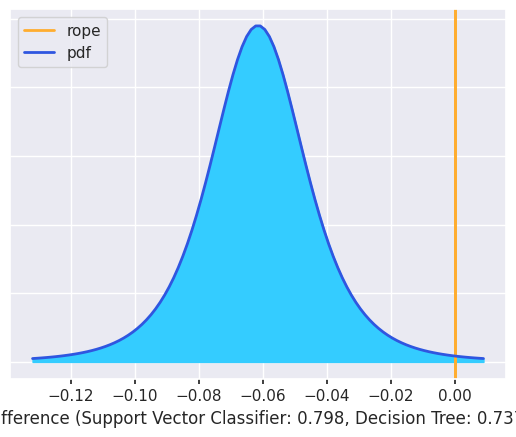

Comparación bayesiana entre Support Vector Classifier y AdaBoost en Precision: (0.6190573532279653, 0.3809426467720347)


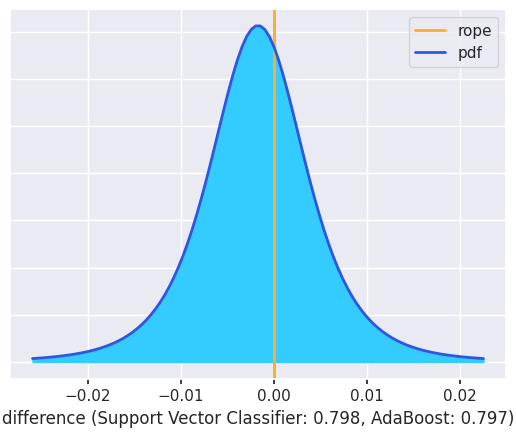

Comparación bayesiana entre Support Vector Classifier y XGBoost en Precision: (0.5430857297562232, 0.45691427024377684)


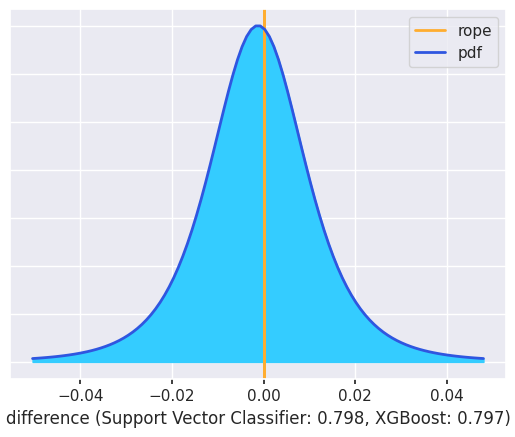

Comparación bayesiana entre Support Vector Classifier y Extra Trees en Precision: (0.9435738237367527, 0.05642617626324731)


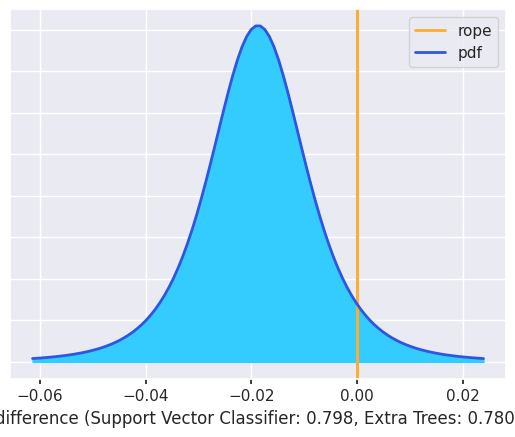

Comparación bayesiana entre KNN Classifier y Decision Tree en Precision: (0.995819782372755, 0.004180217627244964)


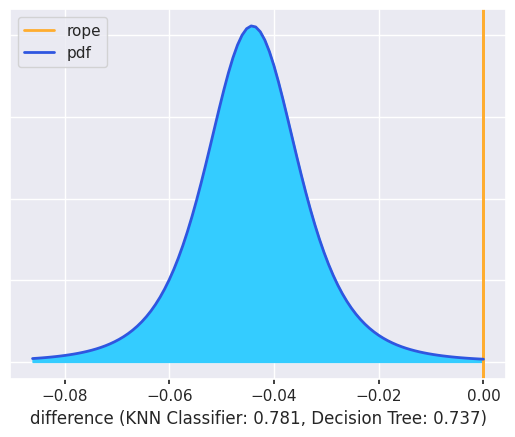

Comparación bayesiana entre KNN Classifier y AdaBoost en Precision: (0.07511369010619062, 0.9248863098938094)


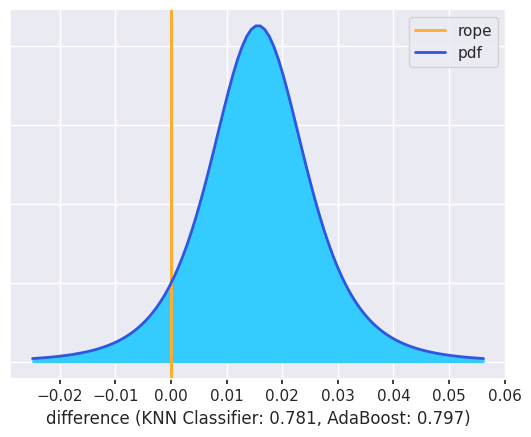

Comparación bayesiana entre KNN Classifier y XGBoost en Precision: (0.02606614165754073, 0.9739338583424593)


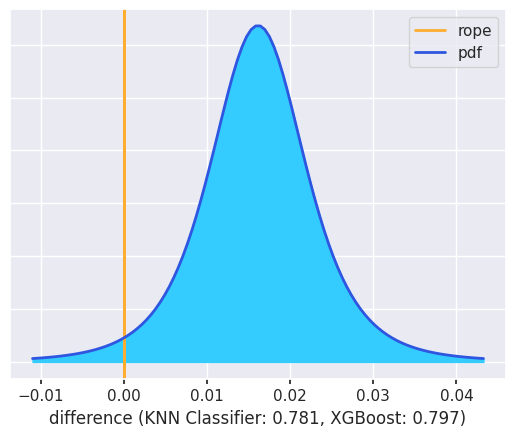

Comparación bayesiana entre KNN Classifier y Extra Trees en Precision: (0.6196790798814482, 0.3803209201185518)


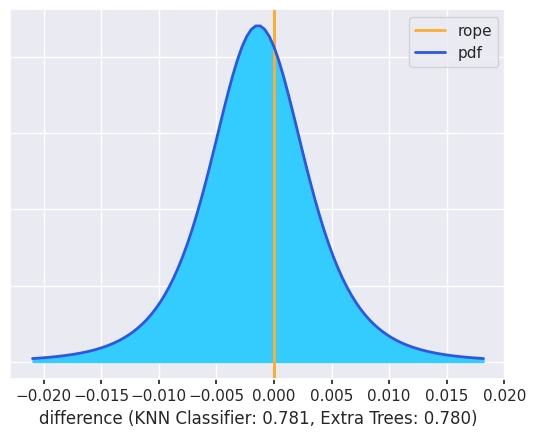

Comparación bayesiana entre Decision Tree y AdaBoost en Precision: (0.009971209985491503, 0.9900287900145085)


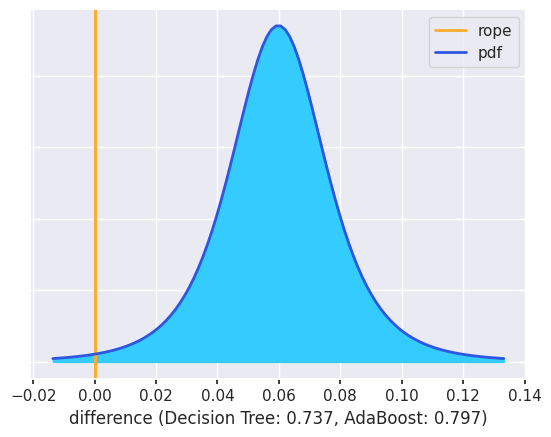

Comparación bayesiana entre Decision Tree y XGBoost en Precision: (0.0018627316799363358, 0.9981372683200637)


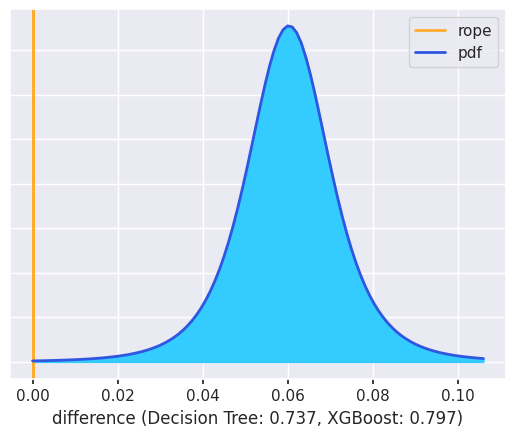

Comparación bayesiana entre Decision Tree y Extra Trees en Precision: (0.0043771332847730715, 0.9956228667152269)


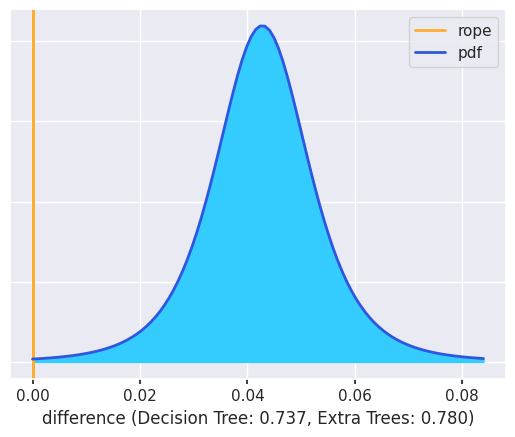

Comparación bayesiana entre AdaBoost y XGBoost en Precision: (0.4823394407105115, 0.5176605592894885)


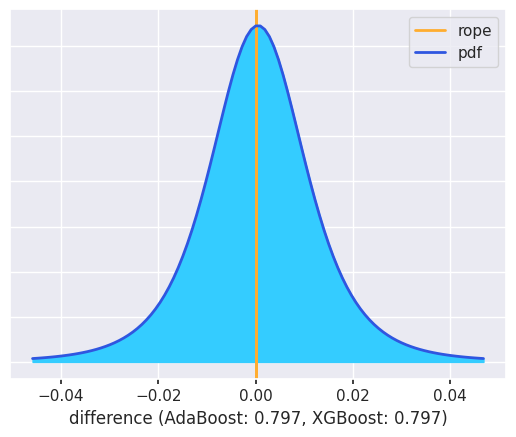

Comparación bayesiana entre AdaBoost y Extra Trees en Precision: (0.9415934565555388, 0.05840654344446117)


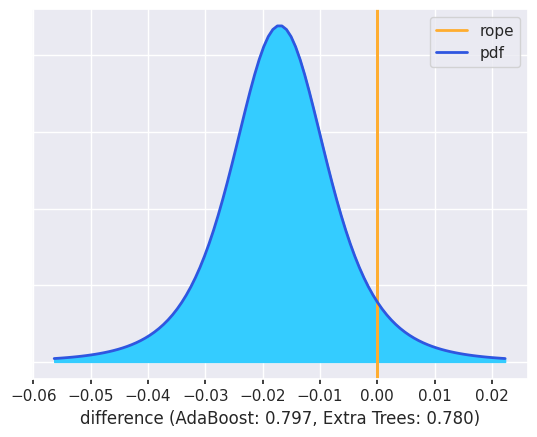

Comparación bayesiana entre XGBoost y Extra Trees en Precision: (0.9734617148886868, 0.026538285111313176)


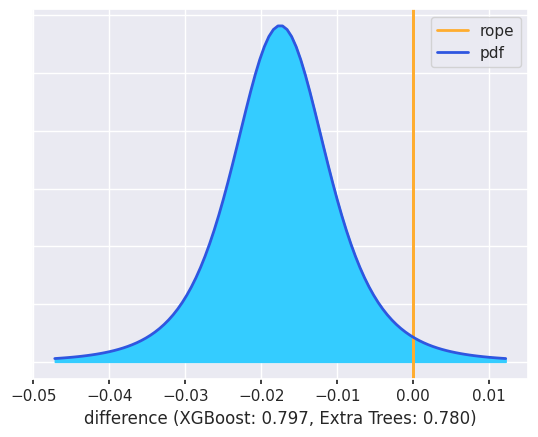

Comparación bayesiana entre Random Forest y CatBoost en F1 score: (0.005246310780724128, 0.9947536892192759)


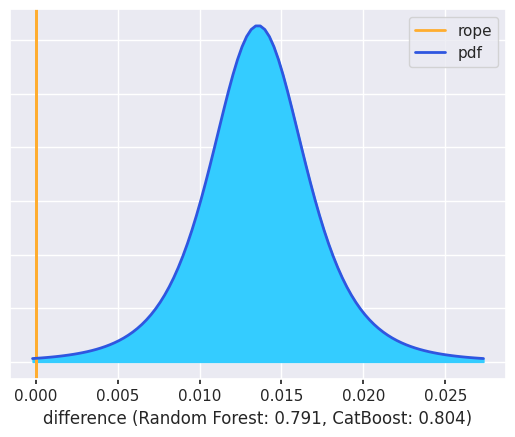

Comparación bayesiana entre Random Forest y Gradient Boosting en F1 score: (0.02239577677032545, 0.9776042232296746)


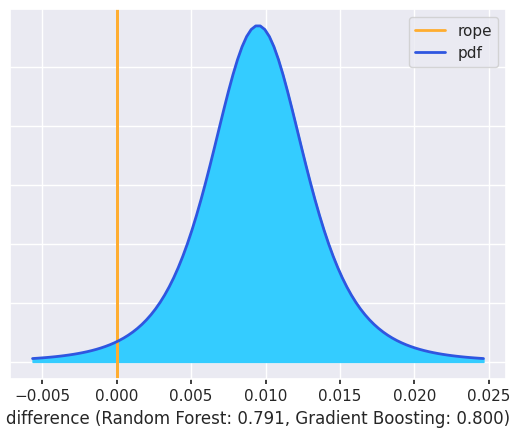

Comparación bayesiana entre Random Forest y Support Vector Classifier en F1 score: (0.7344073252672884, 0.26559267473271164)


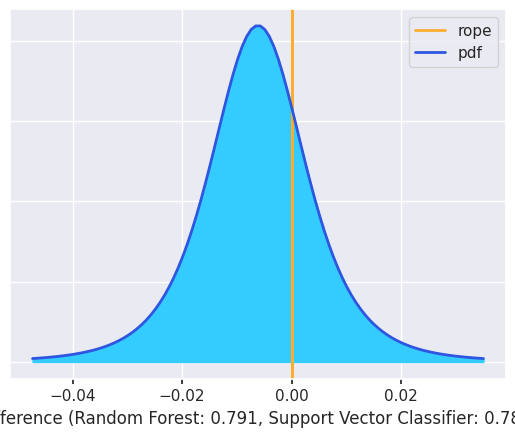

Comparación bayesiana entre Random Forest y KNN Classifier en F1 score: (0.965024610706398, 0.034975389293602)


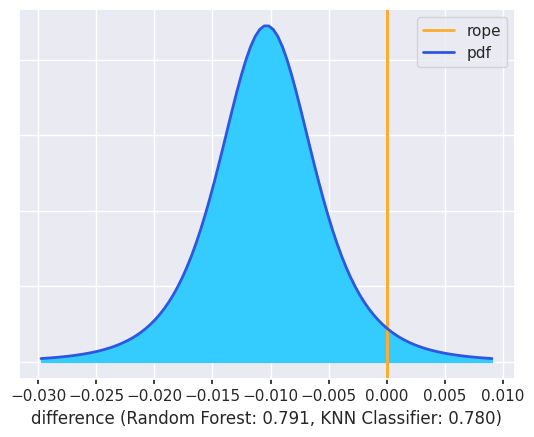

Comparación bayesiana entre Random Forest y Decision Tree en F1 score: (0.9969127507354989, 0.003087249264501102)


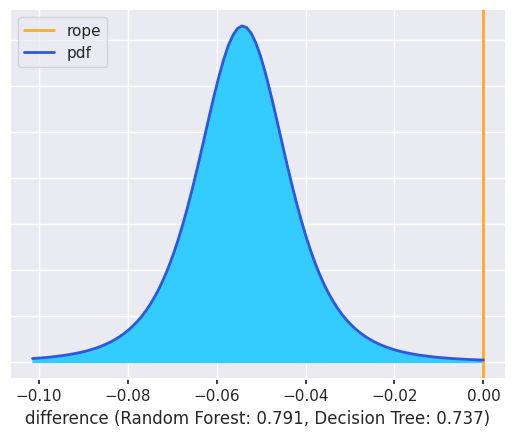

Comparación bayesiana entre Random Forest y AdaBoost en F1 score: (0.2863812059182874, 0.7136187940817126)


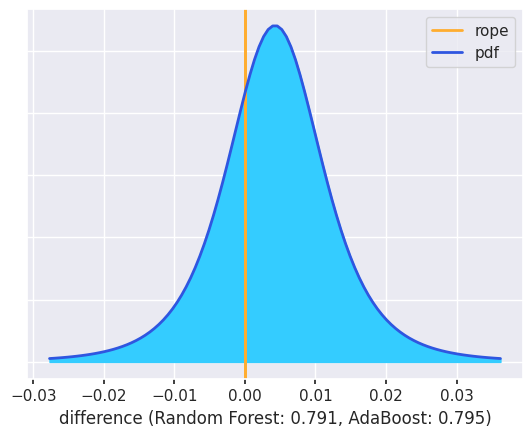

Comparación bayesiana entre Random Forest y XGBoost en F1 score: (0.15652788884567825, 0.8434721111543217)


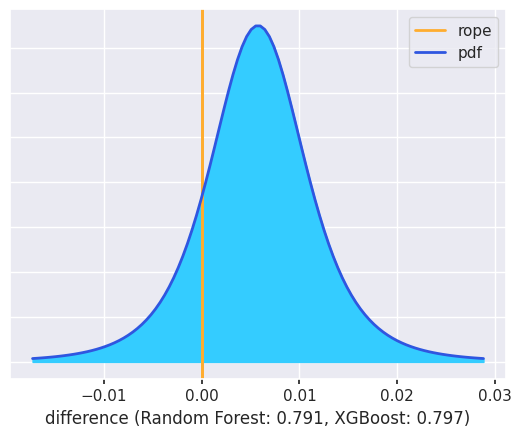

Comparación bayesiana entre Random Forest y Extra Trees en F1 score: (0.9942349529417727, 0.005765047058227335)


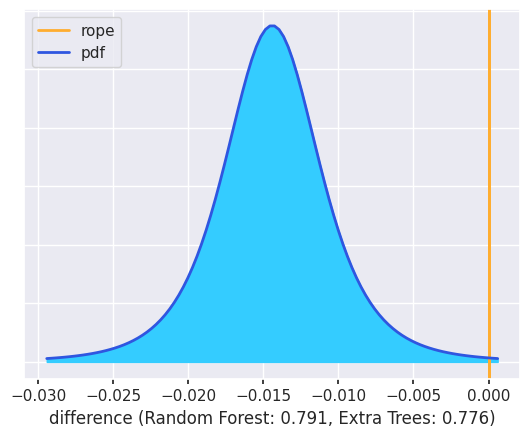

Comparación bayesiana entre CatBoost y Gradient Boosting en F1 score: (0.7853658919687373, 0.2146341080312627)


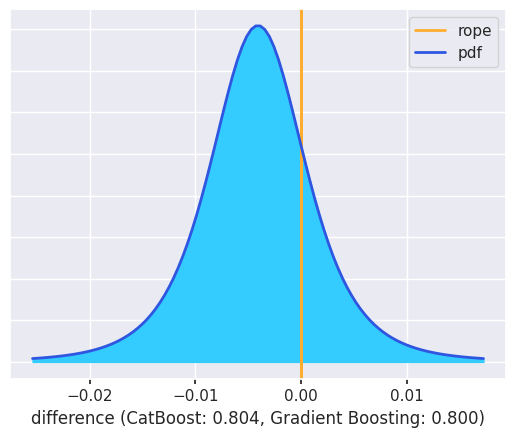

Comparación bayesiana entre CatBoost y Support Vector Classifier en F1 score: (0.9364365433621679, 0.06356345663783214)


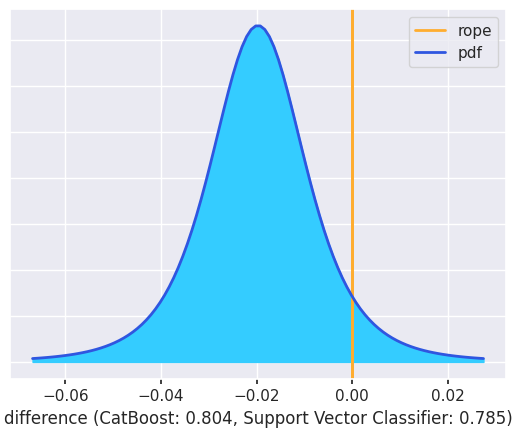

Comparación bayesiana entre CatBoost y KNN Classifier en F1 score: (0.9926471354241108, 0.00735286457588924)


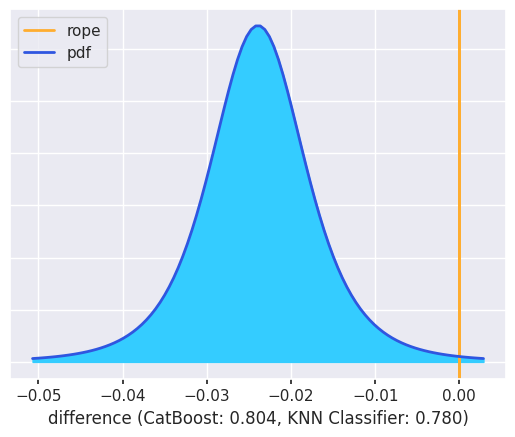

Comparación bayesiana entre CatBoost y Decision Tree en F1 score: (0.9981112311734389, 0.0018887688265610825)


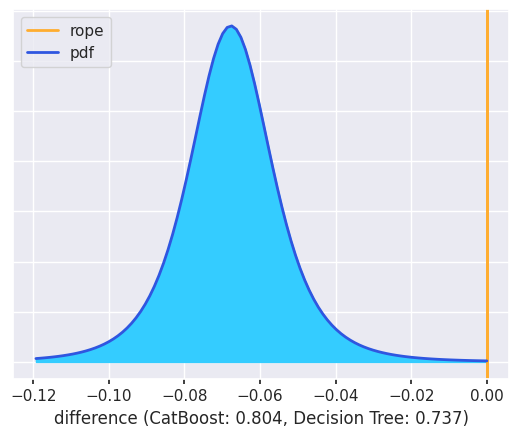

Comparación bayesiana entre CatBoost y AdaBoost en F1 score: (0.8496397693561994, 0.15036023064380055)


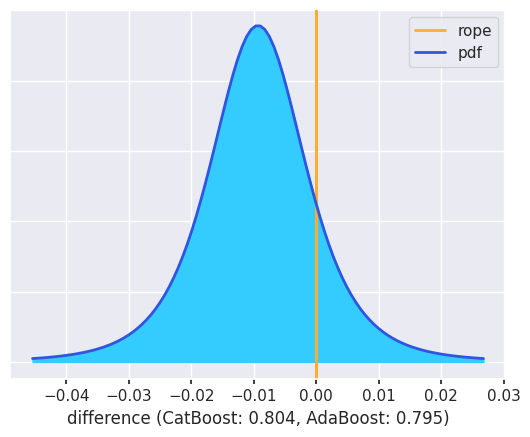

Comparación bayesiana entre CatBoost y XGBoost en F1 score: (0.967627601108256, 0.032372398891744036)


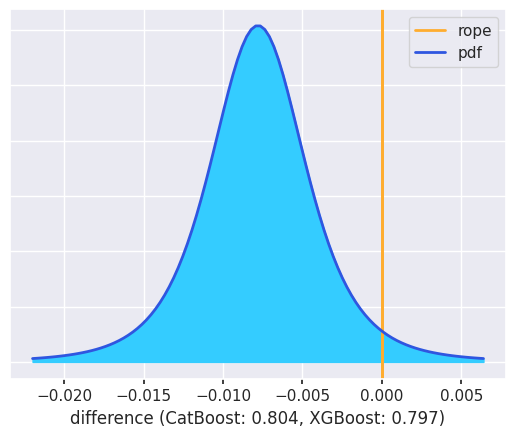

Comparación bayesiana entre CatBoost y Extra Trees en F1 score: (0.9957562874445735, 0.004243712555426549)


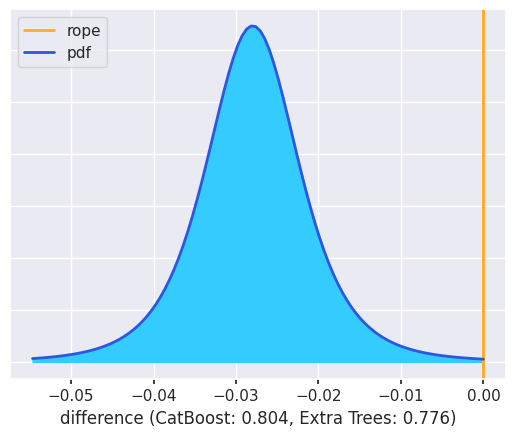

Comparación bayesiana entre Gradient Boosting y Support Vector Classifier en F1 score: (0.9578501786973741, 0.0421498213026259)


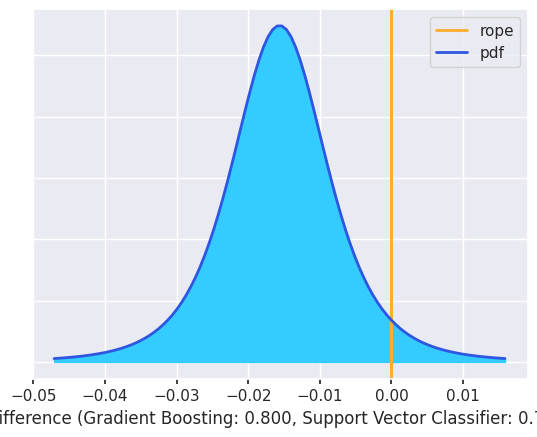

Comparación bayesiana entre Gradient Boosting y KNN Classifier en F1 score: (0.9858589061281865, 0.014141093871813504)


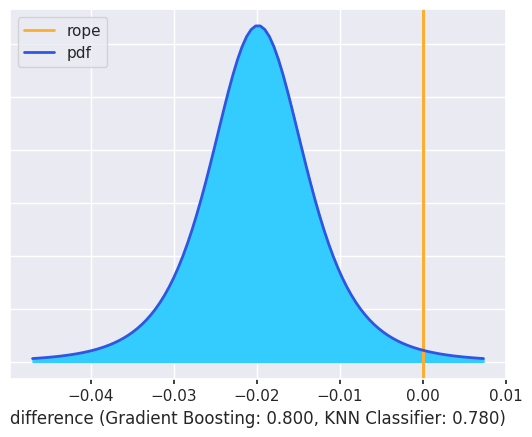

Comparación bayesiana entre Gradient Boosting y Decision Tree en F1 score: (0.9955438864014945, 0.004456113598505507)


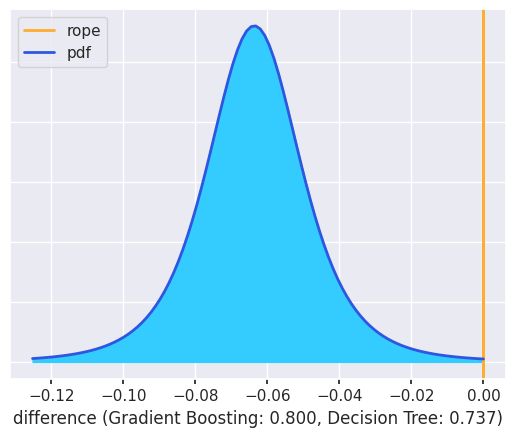

Comparación bayesiana entre Gradient Boosting y AdaBoost en F1 score: (0.8324282105962174, 0.1675717894037826)


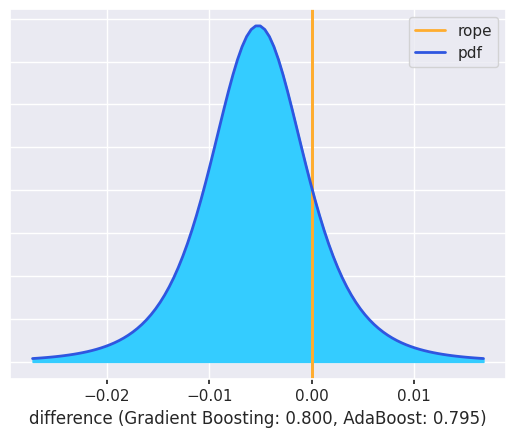

Comparación bayesiana entre Gradient Boosting y XGBoost en F1 score: (0.6883708064793792, 0.3116291935206208)


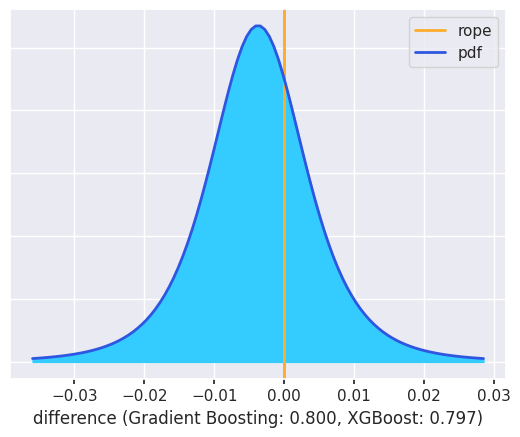

Comparación bayesiana entre Gradient Boosting y Extra Trees en F1 score: (0.9933730789943271, 0.006626921005672859)


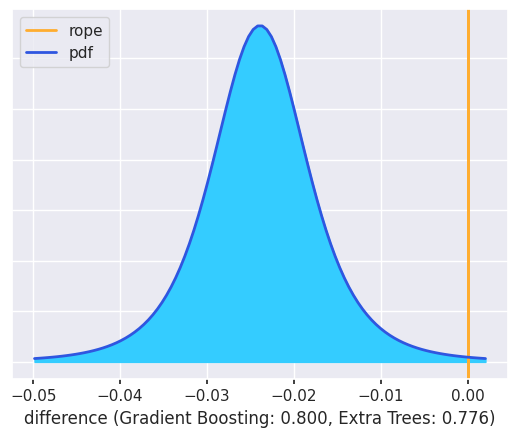

Comparación bayesiana entre Support Vector Classifier y KNN Classifier en F1 score: (0.6718668969203685, 0.3281331030796315)


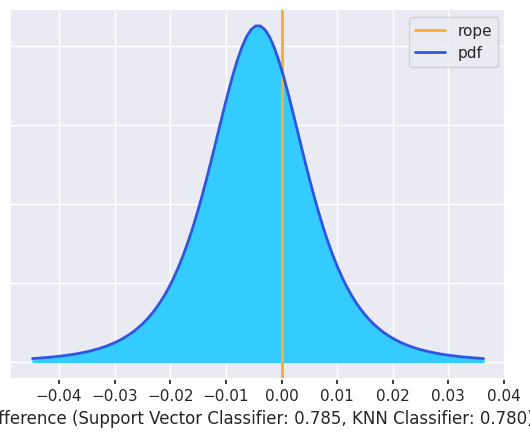

Comparación bayesiana entre Support Vector Classifier y Decision Tree en F1 score: (0.973301043349242, 0.026698956650758054)


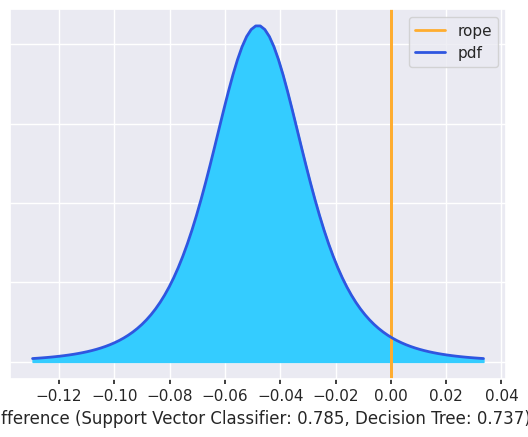

Comparación bayesiana entre Support Vector Classifier y AdaBoost en F1 score: (0.04704815332422607, 0.9529518466757739)


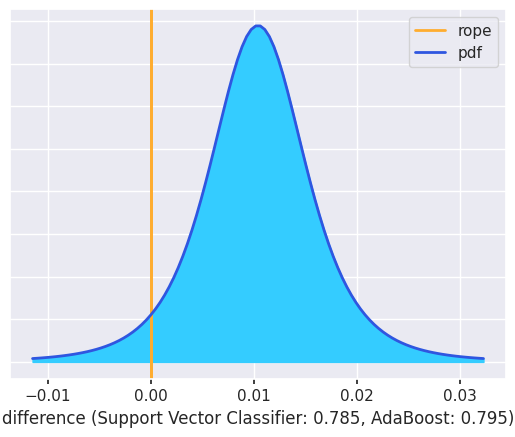

Comparación bayesiana entre Support Vector Classifier y XGBoost en F1 score: (0.19165906152869205, 0.808340938471308)


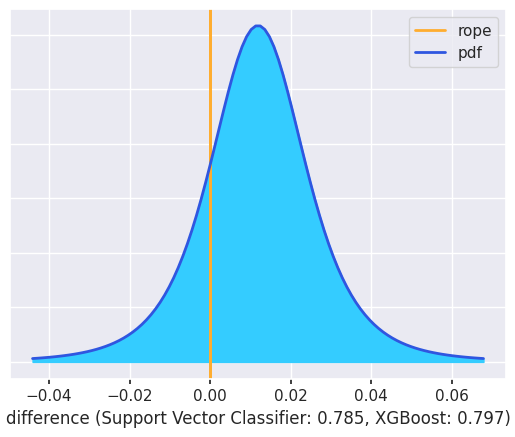

Comparación bayesiana entre Support Vector Classifier y Extra Trees en F1 score: (0.7623010308729119, 0.2376989691270881)


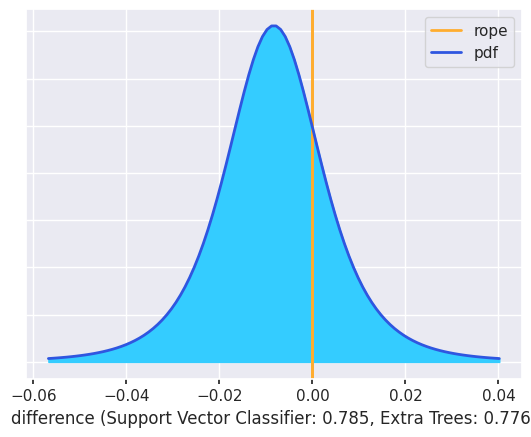

Comparación bayesiana entre KNN Classifier y Decision Tree en F1 score: (0.9951395360877513, 0.0048604639122487026)


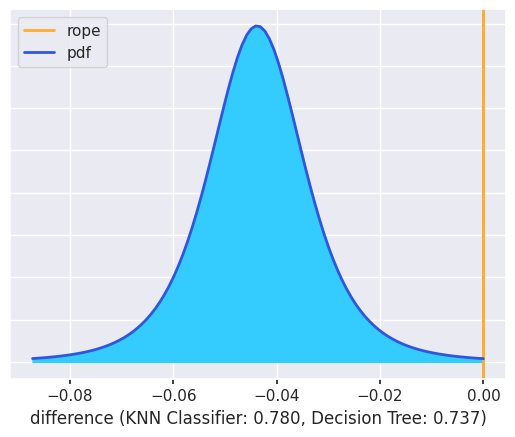

Comparación bayesiana entre KNN Classifier y AdaBoost en F1 score: (0.08966367029509059, 0.9103363297049094)


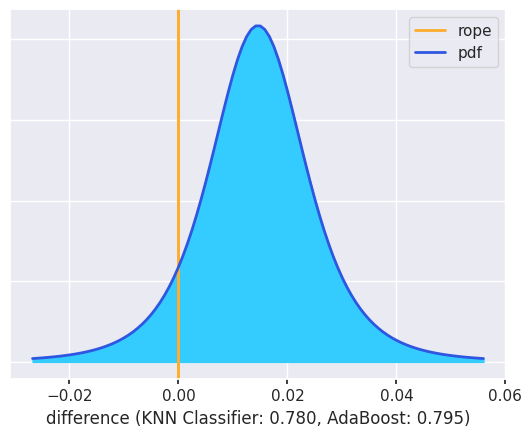

Comparación bayesiana entre KNN Classifier y XGBoost en F1 score: (0.02597213853605651, 0.9740278614639435)


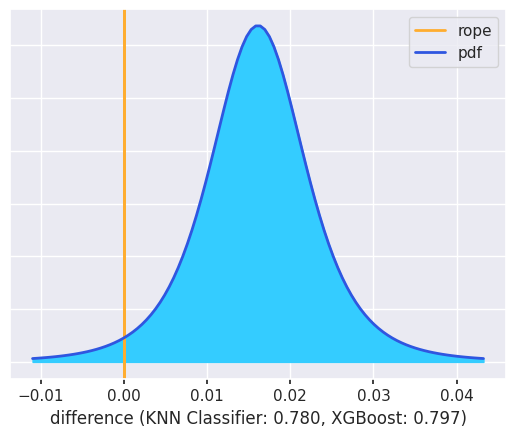

Comparación bayesiana entre KNN Classifier y Extra Trees en F1 score: (0.810302244763025, 0.18969775523697496)


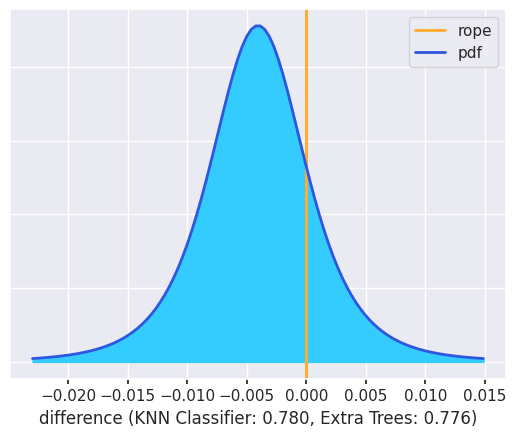

Comparación bayesiana entre Decision Tree y AdaBoost en F1 score: (0.012395017660540186, 0.9876049823394598)


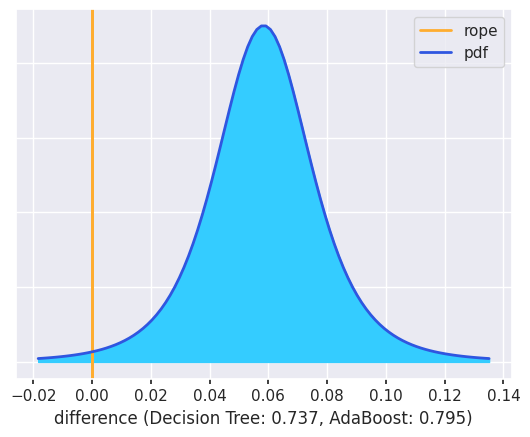

Comparación bayesiana entre Decision Tree y XGBoost en F1 score: (0.0020440563775140363, 0.997955943622486)


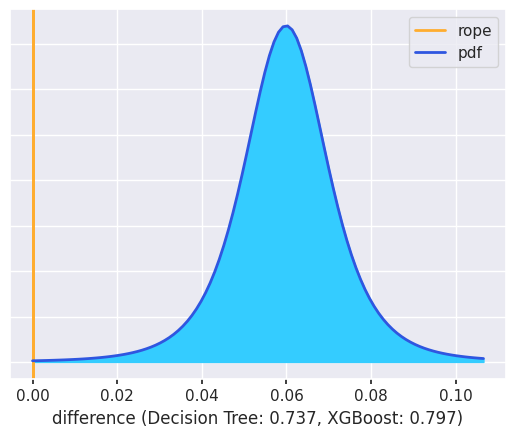

Comparación bayesiana entre Decision Tree y Extra Trees en F1 score: (0.003971433356375065, 0.9960285666436249)


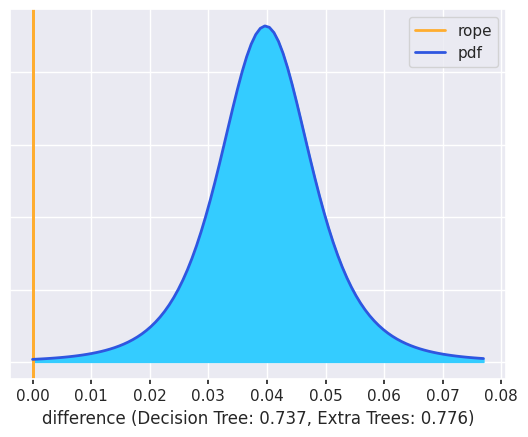

Comparación bayesiana entre AdaBoost y XGBoost en F1 score: (0.44660071587180006, 0.5533992841281999)


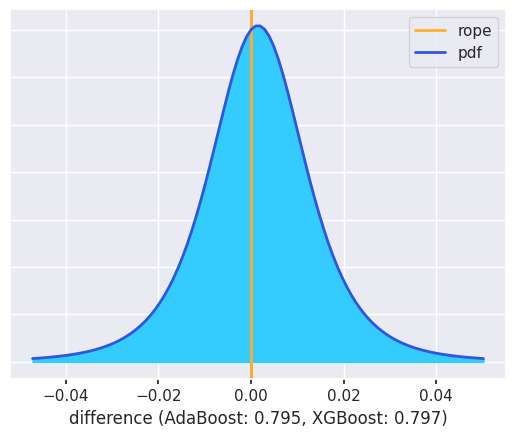

Comparación bayesiana entre AdaBoost y Extra Trees en F1 score: (0.9423060504966545, 0.0576939495033455)


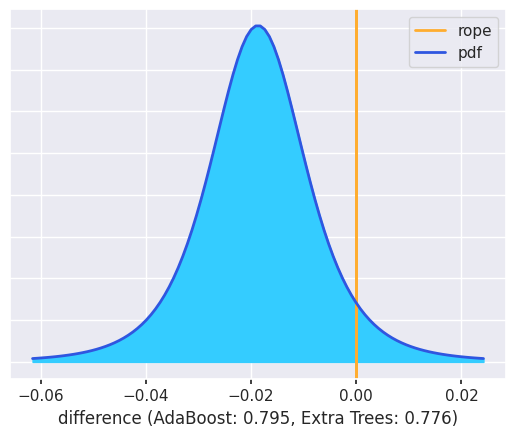

Comparación bayesiana entre XGBoost y Extra Trees en F1 score: (0.9808181064971243, 0.01918189350287569)


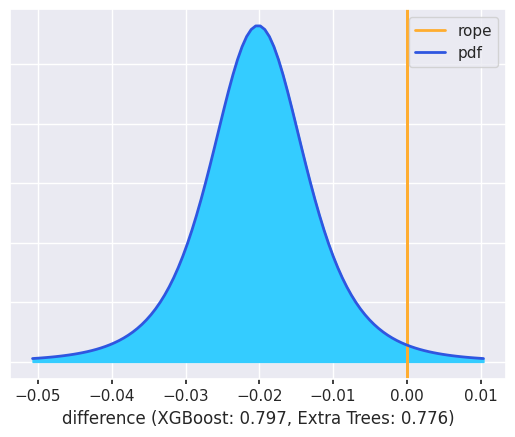

In [ ]:
# 6. Comparación bayesiana de todos los clasificadores ------------------------------------------------------------------------------------------------
# Función para realizar comparaciones bayesianas entre todos los pares de modelos y generar gráficos
def comparaciones_bayesianas(df, nombre_metrica):
    rope = 0.0                                          # Región de Equivalencia Práctica (ROPE)
    bayes_comparison_results = {}

    # Comparar todos los pares únicos de modelos
    for i, modelo_1 in enumerate(df.columns):
        for j, modelo_2 in enumerate(df.columns):
            if i < j:                                   # Evitar comparaciones duplicadas y autocomparaciones
                # Realizar la comparación bayesiana entre los dos modelos seleccionados usando two_on_single
                probs, fig = baycomp.two_on_single(
                    df[modelo_1].values,                # Resultados del primer modelo
                    df[modelo_2].values,                # Resultados del segundo modelo
                    rope=rope,
                    plot=True,                          # Generar el gráfico
                    names=(modelo_1, modelo_2)          # Nombres para los modelos
                )
                bayes_comparison_results[(modelo_1, modelo_2)] = probs
                # Imprimir los resultados
                print(f"Comparación bayesiana entre {modelo_1} y {modelo_2} en {nombre_metrica}: {probs}")

                # Guardar el gráfico
                # fig.savefig(f"Comparacion_Bayesiana_{modelo_1}_vs_{modelo_2}_{nombre_metrica}.png")
                plt.show()

    return bayes_comparison_results

# Realizar comparaciones bayesianas para cada métrica y generar los gráficos
resultados_bayesianos_acc = comparaciones_bayesianas(acc_df, 'Accuracy')
resultados_bayesianos_rec = comparaciones_bayesianas(rec_df, 'Recall')
resultados_bayesianos_pres = comparaciones_bayesianas(pres_df, 'Precision')
resultados_bayesianos_f1 = comparaciones_bayesianas(f1_df, 'F1 score')

La gráfica que nos interesa analizar es la de Catboost vs Gradient Boosting, pues son los modelos que más altos salieron en las métricas medidas anteriormente.
Esta gráfica muestra un resultado ligeramente mejor a favor de Catboost, con una proporción de aproximadamente 77.3% para este modelo frente a 22.7% para Gradient Boosting.

# Entrenamiento del modelo y busqueda de hiperparametros

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate   #type: ignore
from catboost import CatBoostClassifier  #type: ignore
from sklearn.model_selection import GridSearchCV

# Cargar el dataset y preparar datos
df = pd.read_csv("train.csv")
X = pd.read_csv("DF.csv")
# Separar train y test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns = ["Name", "Transported"]),
    df["Transported"],
    test_size = 0.2,                    # El test será el 20% del dataset de entrenamiento
    random_state = 42
)

Se utilizó una busqueda de hiperparámetros a través de GridSearch para obtener buenos valores iniciales y comenzar a hacer un fine tunning basados en valores cercanos a los parámetros encontrados con este método.

In [ ]:
# Búsqueda de hiperparámetros
param_grid = [{'iterations': [1000, 1500],
               'learning_rate': [0.01, 0.03],
               'max_depth': [4, 5, 6],
               'l2_leaf_reg': [3, 5]}]

cat2 = CatBoostClassifier(verbose=0)
grid_search = GridSearchCV(cat2, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y_train)

print()
print("Grid mejores parámetros: ",grid_search.best_params_)
print("Grid mejor estimador: ",grid_search.best_estimator_)


Grid mejores parámetros:  {'iterations': 1500, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 4}
Grid mejor estimador:  <catboost.core.CatBoostClassifier object at 0x7f166177dba0>


Una vez hecho esta busqueda, se comenzó una búsqueda de parámetros random utilizando RandomSearch en valores cercanos a los obtenidos en el Grid search.
(El código del random search se encuentra en el github como RandomCatboost.py)

In [ ]:
# cat_new = CatBoostClassifier(iterations= 1500, l2_leaf_reg= 3, learning_rate= 0.01, max_depth= 4, verbose= 0)
cat_new = CatBoostClassifier(iterations= 1250, l2_leaf_reg= 9, learning_rate= 0.03, max_depth= 6, verbose= 0)
cat_new.fit(X, y_train)

scoring = ['accuracy', 'precision', 'recall', 'f1']
results = cross_validate(cat_new, X, y_train, cv=5, scoring=scoring, return_train_score=False)

print(f"Accuracy: {results['test_accuracy'].mean()} ± {results['test_accuracy'].std()}")
print(f"Precision: {results['test_precision'].mean()} ± {results['test_precision'].std()}")
print(f"Recall: {results['test_recall'].mean()} ± {results['test_recall'].std()}")
print(f"F1 Score: {results['test_f1'].mean()} ± {results['test_f1'].std()}")

Accuracy: 0.8037108027452946 ± 0.007213116946646513
Precision: 0.7978622117066463 ± 0.016303938621608727
Recall: 0.818 ± 0.015974469426850702
F1 Score: 0.8075174136750018 ± 0.005495971454761899


## Matríz de confusión



### Funciones de data cleaning

In [ ]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split  #type: ignore
from collections import Counter
from sklearn.preprocessing import MinMaxScaler  #type: ignore
from sklearn.impute import KNNImputer #type: ignore
from sklearn.preprocessing import LabelEncoder

# Separar datos numéricos y categóricos
def num_cat_separation(X):
    df_num = X.select_dtypes(include = ["int64", "float64"])
    df_cat = X.select_dtypes(include = ["object"])

    return df_cat, df_num

# Crear los diccionarios de conteo de clases y valores faltantes
def storeMS(df):
  class_counts = {}
  missing_values = {}

  for col in df.columns:
    class_count = Counter(df[col].dropna())  # Excluir valores faltantes al contar clases
    class_counts[col] = class_count
    missing_values[col] = df[col].isnull().sum()

  return class_counts, missing_values

# Tratamiento de datos CATEGÓRICOS
def cat_KNN_cleaning(df_cat, col):
    # Imputación predictiva o basada en KNN
    df_cat[col] = df_cat[col].fillna("NotApply")

    return df_cat

# Tratamiento de datos NUMÉRICOS (KNN)
def num_KNN_cleaning(df_num, col):
    imputer = KNNImputer(n_neighbors=3)
    df_imputed = imputer.fit_transform(df_num[[col]])
    df_num[col] = df_imputed

    return df_num

# Rellenar datos numéricos y faltantes usando imputación
def fill_data(DF, llave, column):
  if llave == "Moda":
    DF[column] = DF[column].fillna(DF[column].mode()[0])
  elif llave == "NewCat":
    if pd.api.types.is_numeric_dtype(DF[column]):
      DF[column] = DF[column].fillna(0.0)
    else:
      DF[column] = DF[column].fillna(False)
  else:
    if pd.api.types.is_numeric_dtype(DF[column]):
      num_KNN_cleaning(DF, column)
    else:
      cat_KNN_cleaning(DF, column)

#Hacer la imputación de cada columna dependiendo la sugerencia
def imputation(df, class_counts, missing_values):
  for col, counts in class_counts.items():
      if missing_values[col] != 0:
        most_common_class, most_common_count = counts.most_common(1)[0]
        total_non_null = sum(counts.values())

        if most_common_count / total_non_null < 0.5:
            fill_data(df, "Moda", col)
        elif missing_values[col] / len(df) < 0.05:
            fill_data(df, "NewCat", col)
        else:
            fill_data(df, "KNN", col)

# Realiza label encoding
def label_encoding(df, col):
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  return df

# Realiza one-hot encoding
def one_hot_encoding(df, cols):
  one_hot = pd.get_dummies(df, columns=cols)
  return one_hot

# Realiza una codificación dependiendo del tipo de columna
def encode_dataframe(df):
  for col in df:
    if col == "PassengerId":
      df['group'] = df['PassengerId'].str.split('_').str[0]
      group_counts = df['group'].value_counts()
      df['Has_family'] = df['group'].map(lambda x: True if group_counts[x] > 1 else False)
      df.drop(columns=['PassengerId', 'group'], inplace=True)
    elif col == "Cabin":
      df[['Deck', 'Side']] = df['Cabin'].str.split('/', expand=True).iloc[:, [0, 2]]
      df = label_encoding(df, 'Deck')
      df = pd.get_dummies(df, columns=['Side'])
      df.drop(columns=['Cabin'], inplace=True)
    elif col == "HomePlanet" or col == "Destination":
      df = one_hot_encoding(df, [col])
    else:
      pass
  return df

# Combina los DataFrames de datos numéricos y categóricos
def combine_num_cat(df_cat, df_num):
    # Aseguramos que los índices coinciden
    if not df_cat.index.equals(df_num.index):
        df_cat = df_cat.reset_index(drop=True)
        df_num = df_num.reset_index(drop=True)

    # Combina los DataFrames por columnas
    df_combined = pd.concat([df_cat, df_num], axis=1)

    return df_combined


### Preparación del dataset

In [ ]:
# Separar datos numéricos y categóricos para el conjunto de prueba
df_cat_test, df_num_test = num_cat_separation(x_test)

# Codifica los datos categóricos
df_cat_test = encode_dataframe(df_cat_test)

# Crear los diccionarios de conteo de clases y valores faltantes
class_counts_num_test, missing_values_num_test = storeMS(df_num_test)
class_counts_cat_test, missing_values_cat_test = storeMS(df_cat_test)

# Imputación de datos
imputation(df_num_test, class_counts_num_test, missing_values_num_test)
imputation(df_cat_test, class_counts_cat_test, missing_values_cat_test)

df_new_test = combine_num_cat(df_cat_test, df_num_test)

# Importación del modelo final

In [ ]:
#Importar modelo
import joblib
modelo = joblib.load('model.joblib')

# Hacer predicción
y_pred = modelo.predict(df_new_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Graficar matriz de confusión

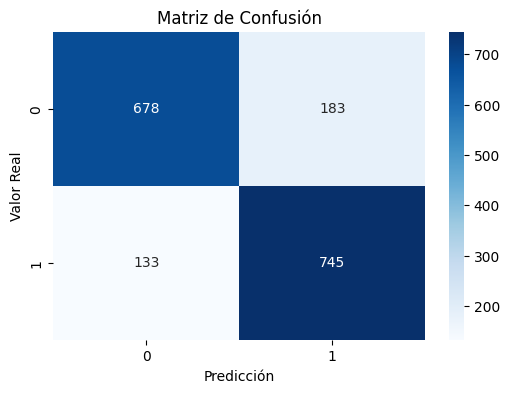

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configurar títulos y etiquetas
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# KAGGLE

### Construcción del submission.csv

In [ ]:
test = pd.read_csv("test.csv")
id = test["PassengerId"]
id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

### Preparar datos de test

In [ ]:
# Separar datos numéricos y categóricos
df_cat, df_num = num_cat_separation(test)

# Codifica los datos categóricos
df_cat = encode_dataframe(df_cat)

# Crear los diccionarios de conteo de clases y valores faltantes
class_counts_num, missing_values_num = storeMS(df_num)
class_counts_cat, missing_values_cat = storeMS(df_cat)

# Imputación de datos
imputation(df_num, class_counts_num, missing_values_num)
imputation(df_cat, class_counts_cat, missing_values_cat)

# Combina los DataFrames de datos numéricos y categóricos
df_new = combine_num_cat(df_cat, df_num)

print(df_new)


      CryoSleep    VIP              Name  Has_family  HomePlanet_Earth  \
0          True  False   Nelly Carsoning       False              True   
1         False  False    Lerome Peckers       False              True   
2          True  False   Sabih Unhearfus       False             False   
3         False  False  Meratz Caltilter       False             False   
4         False  False   Brence Harperez       False              True   
...         ...    ...               ...         ...               ...   
4272       True  False       Jeron Peter        True              True   
4273      False  False     Matty Scheron       False              True   
4274       True  False       Jayrin Pore       False             False   
4275      False  False    Kitakan Conale       False             False   
4276       True  False  Lilace Leonzaley       False              True   

      HomePlanet_Europa  HomePlanet_Mars  Deck  Side_P  Side_S  \
0                 False            False     

In [ ]:
df_new.drop(columns = ['Name'], inplace = True)

### Predicciones para test.csv

In [ ]:
#Importar modelo
import joblib

modelo = joblib.load('Model.joblib')
result = modelo.predict(test)

In [ ]:
# Crear un DataFrame a partir de estas listas
df = pd.DataFrame({
    'PassengerId': id,
    'Transported': result
})

In [ ]:
df.to_csv('submission.csv', index=False)